# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip
!pip install xgboost --user --upgrade
!pip install lightgbm --user --upgrade
!pip install catboost --user --upgrade
!pip install mlxtend --user --upgrade

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Regression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostRegressor
from mlxtend.regressor import StackingRegressor, StackingCVRegressor

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

## 사용자 정의 함수

In [3]:
from module_regression import *

# **Base Algorithm:** Linear Regression

In [4]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

In [5]:
# 데이터의 각 column의 타입을 확인하기
df.describe(include='all').T

count      mean      std      min      25%       50%       75%  \
ID_Cell  34,495.00 17,248.00 9,957.99     1.00 8,624.50 17,248.00 25,871.50   
Measure1 34,495.00  4,993.26     4.12 4,983.64 4,990.14  4,992.29  4,995.77   
Measure2 34,495.00  4,992.02     3.94 4,982.74 4,989.08  4,991.10  4,994.38   
Measure3 34,495.00  4,991.39     3.87 4,982.41 4,988.51  4,990.48  4,993.69   
Measure4 34,495.00  4,840.86     0.41 4,837.06 4,840.58  4,840.86  4,841.13   
Measure5 34,495.00  4,840.65     0.39 4,836.85 4,840.38  4,840.64  4,840.91   
gap1_3   34,495.00      1.24     0.25     0.67     1.05      1.20      1.38   
gap2_3   34,495.00      1.87     0.34     1.10     1.63      1.80      2.07   
gap4_5   34,495.00      0.63     0.16     0.05     0.53      0.62      0.74   
target   34,495.00      0.21     0.07    -0.05     0.18      0.21      0.24   
Label    34,495.00      0.00     0.02     0.00     0.00      0.00      0.00   

               max  
ID_Cell  34,495.00  
Measure1  5,015.06  
Measure2  5,013.26  
Measure3  5,012.29  
Measure4  4,846.91  
Measure5  4,846.60  
gap1_3        2.41  
gap2_3        3.13  
gap4_5        1.26  
target        0.64  
Label         1.00

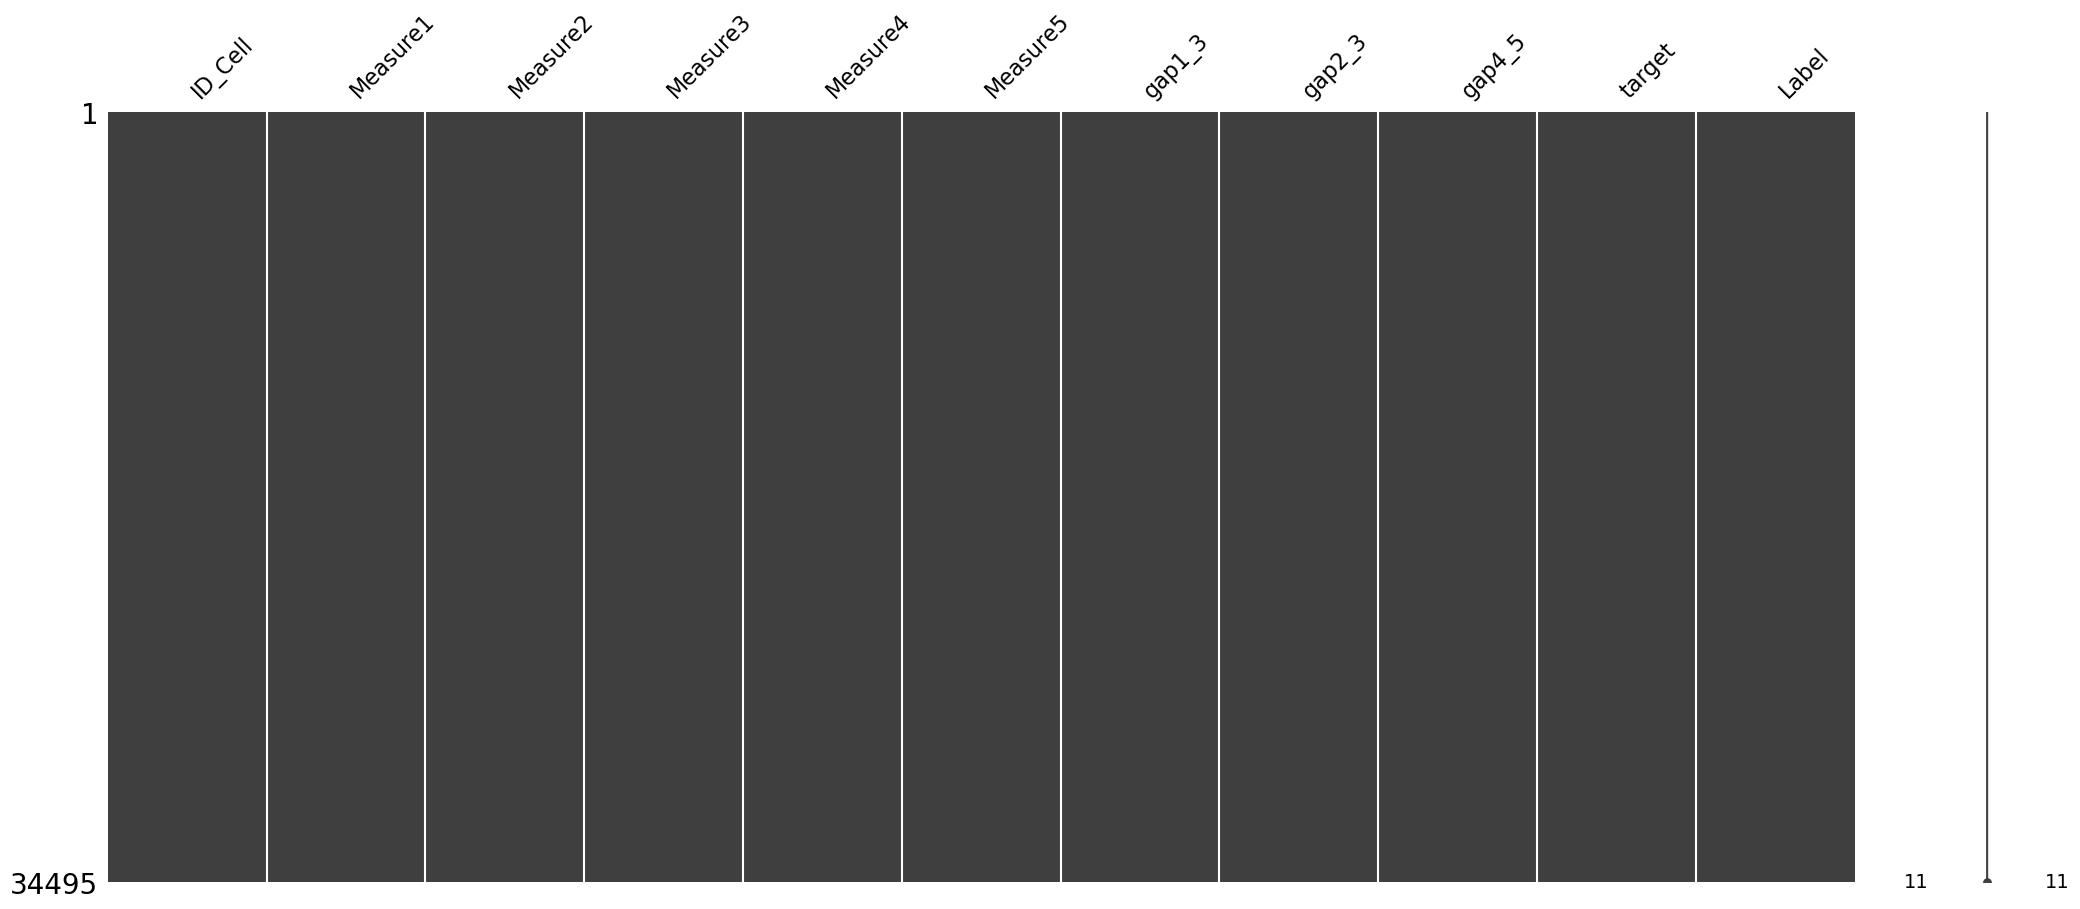

In [6]:
# missingno 모듈 사용하여 결측값의 위치를 확인하기
import missingno as msno

msno.matrix(df)
plt.show()

In [7]:
# train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

(27596, 10) (27596, 1)
(6899, 10) (6899, 1)


In [8]:
# 스케일 조정
scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          6.659e+05
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        23:07:24   Log-Likelihood:                          68392.
No. Observations:               27596   AIC:                                 -1.368e+05
Df Residuals:                   27591   BIC:                                 -1.367e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Measure1       0.0907      0.022      4.210      0.000       0.048       0.133
Measure2       0.9243      0.034     26.836      0.000       0.857       0.992
Measure3      -1.0294      0.026    -39.172      0.000      -1.081      -0.978
Measure4       9.4892      0.018    537.186      0.000       9.455       9.524
Measure5      -8.8642      0.017   -507.247      0.000      -8.898      -8.830
==============================================================================
Omnibus:                     6985.014   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134103.377
Skew:                          -0.734   Prob(JB):                         0.00
Kurtosis:                      13.699   Cond. No.                         271.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

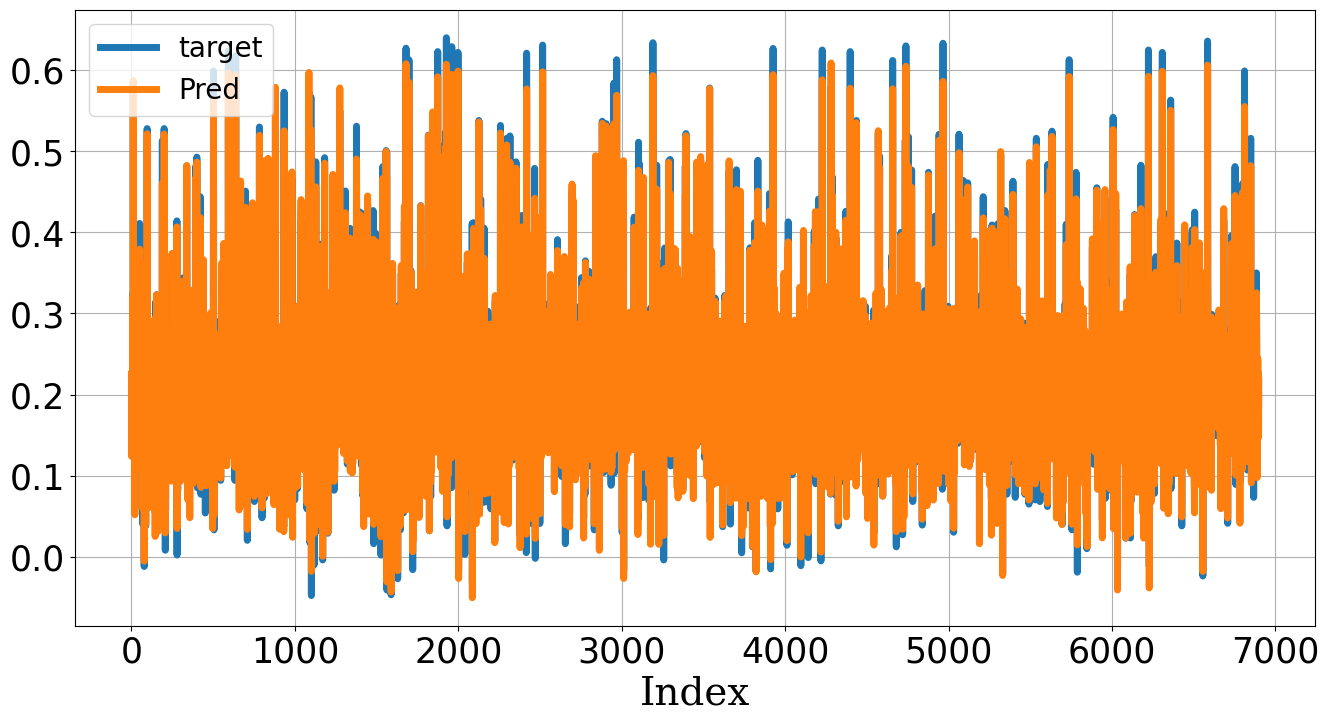

MAE  MSE  MAPE
Train 0.02 0.00  0.12
Test  0.02 0.00  0.10

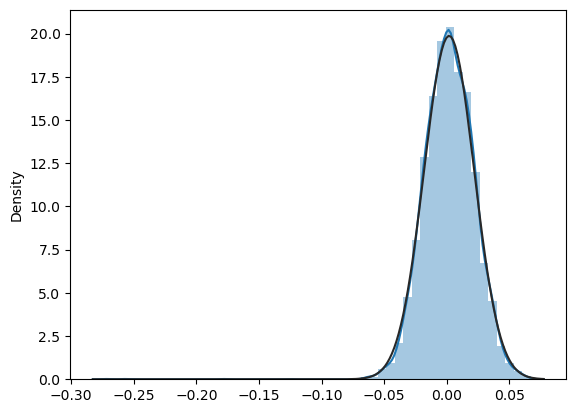

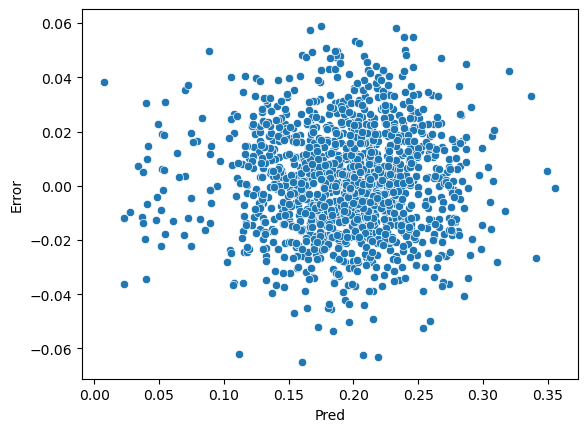

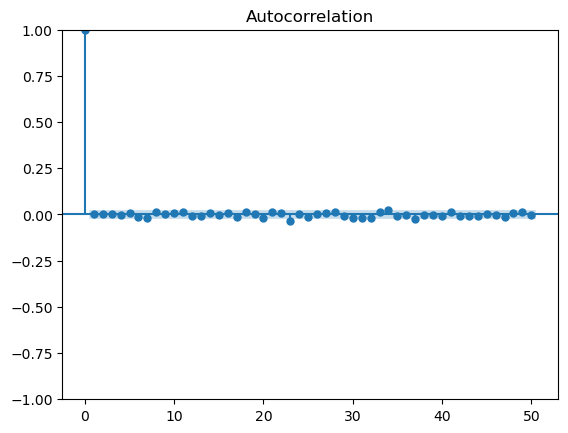

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.97               0.90             6.13   
p-value               0.00               0.00             0.80   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            50.77  
p-value                     0.44  
Alternative                  NaN

In [9]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Linear Regression
model_lr = sm.OLS(Y_train, X_train).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test), columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lr = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lr)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Regularization

## Ridge

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


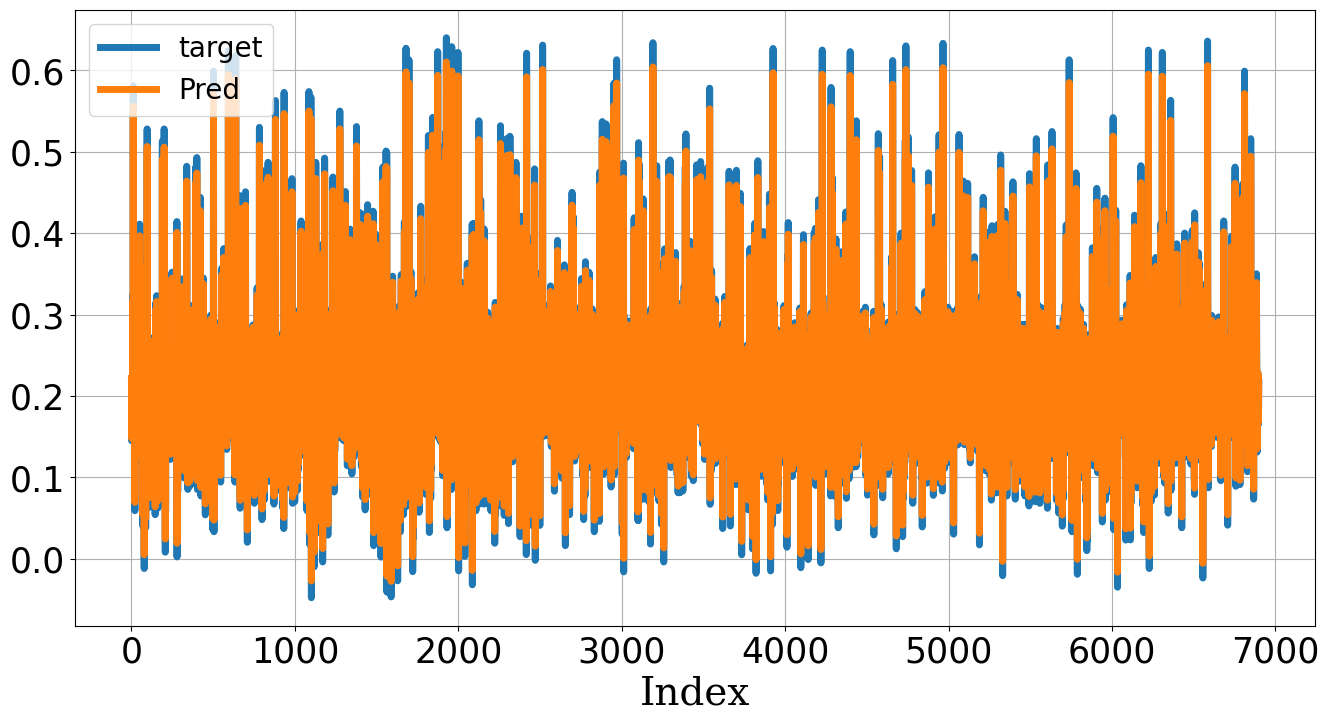

MAE  MSE  MAPE
Train 0.00 0.00  0.06
Test  0.00 0.00  0.03

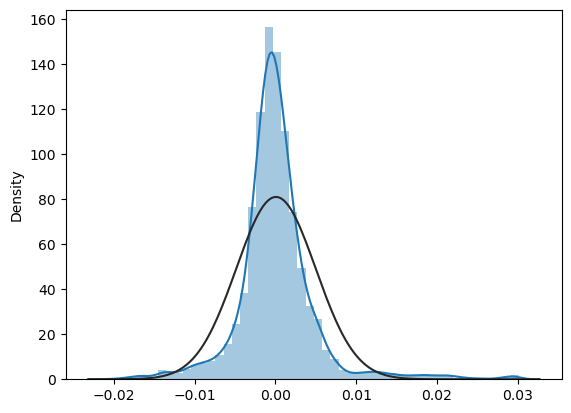

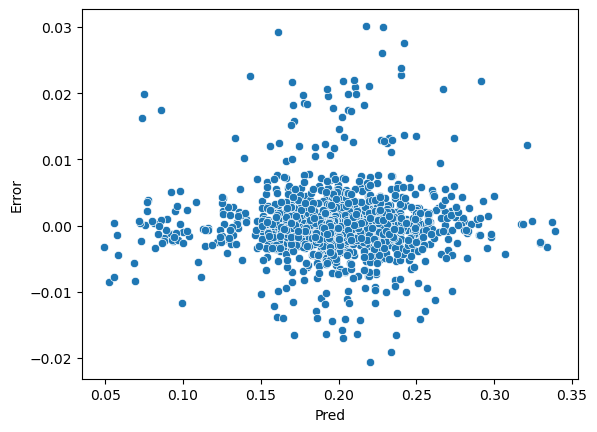

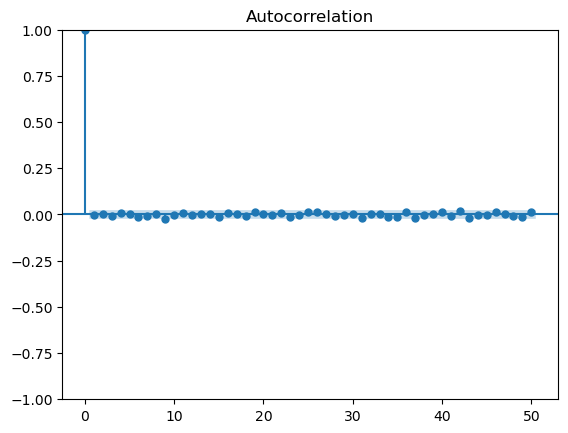

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.85               0.90             7.14   
p-value               0.00               0.00             0.71   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            35.95  
p-value                     0.93  
Alternative                  NaN

In [10]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Ridge
alpha_weight = 0.05
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True, 
                    normalize=False, random_state=123)    # 정규화 스케일링 = False
model_ridge.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_ridge.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_ridge.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_ridge = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_ridge)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Lasso

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


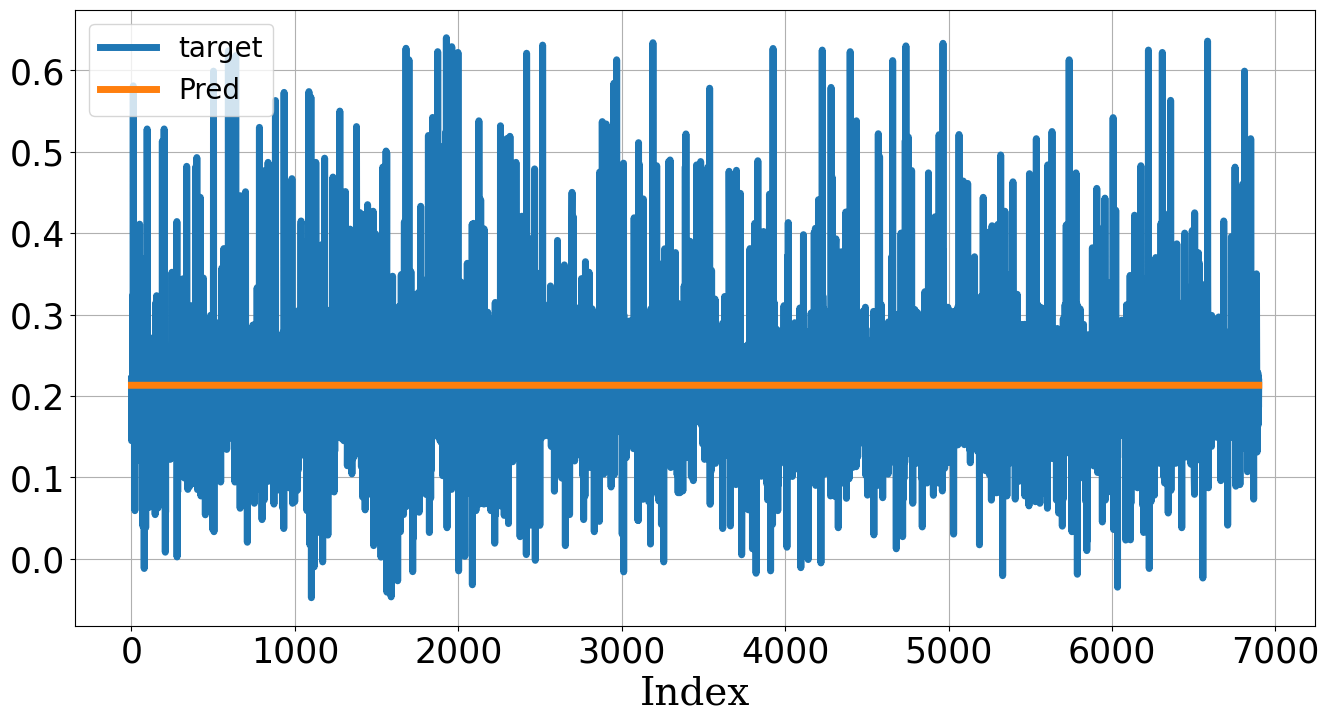

MAE  MSE  MAPE
Train 0.04 0.00  0.74
Test  0.04 0.00  0.43

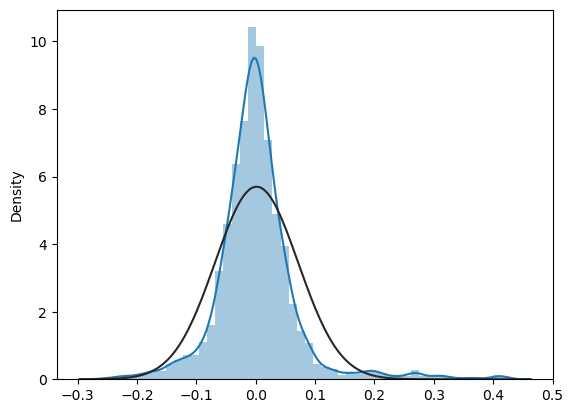

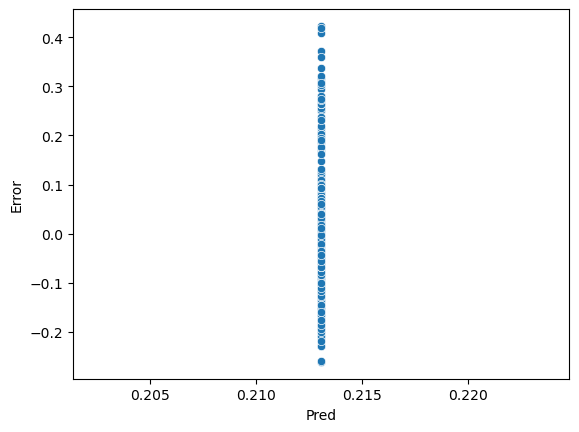

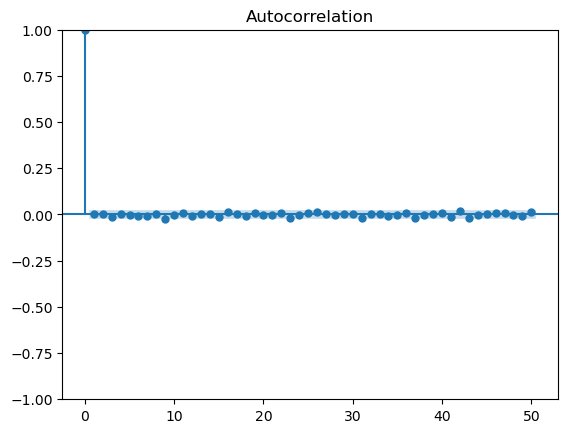

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.86               0.90             6.36   
p-value               0.00               0.00             0.78   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            31.34  
p-value                     0.98  
Alternative                  NaN

In [11]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Lasso
alpha_weight = 0.05
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True, 
                    normalize=False, random_state=123)    # 정규화 스케일링 = False
model_lasso.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_lasso.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_lasso.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lasso = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lasso)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Elastic Net

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


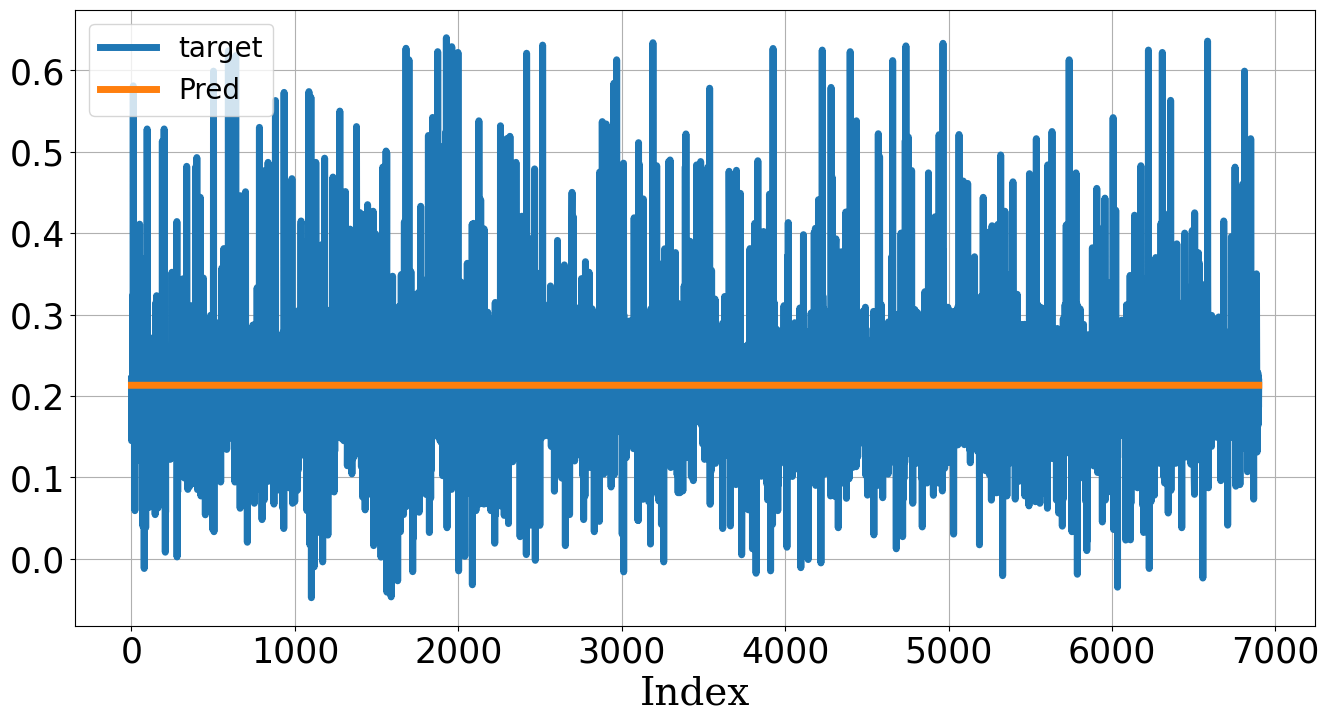

MAE  MSE  MAPE
Train 0.04 0.00  0.74
Test  0.04 0.00  0.43

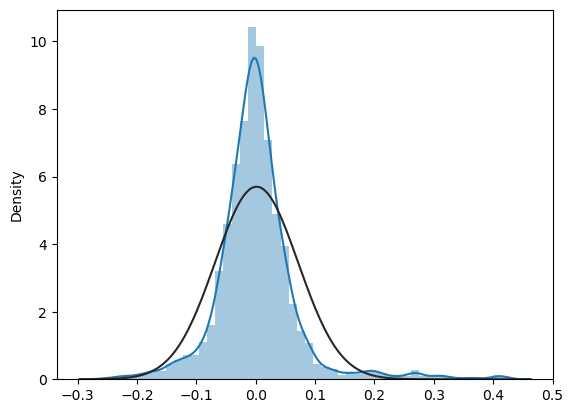

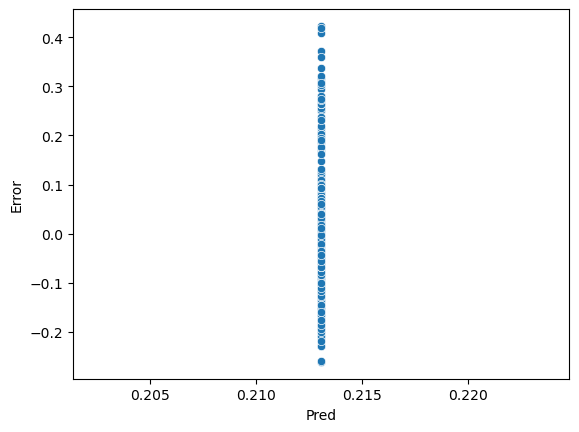

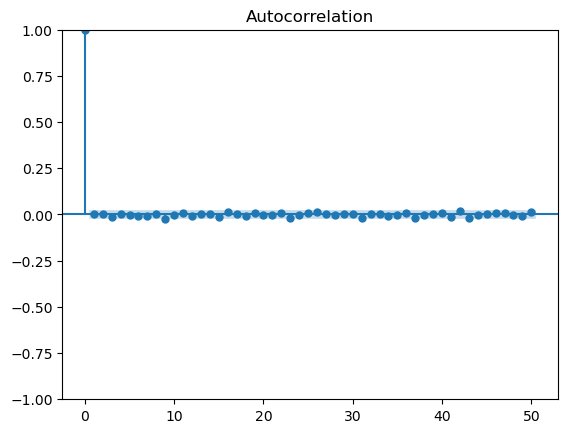

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.86               0.90             6.36   
p-value               0.00               0.00             0.78   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            31.34  
p-value                     0.98  
Alternative                  NaN

In [12]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Elastic Net
model_en = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, 
                      normalize=False, random_state=123)    # 정규화 스케일링 = False
model_en.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_en.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_en.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_en = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_en)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Voting

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


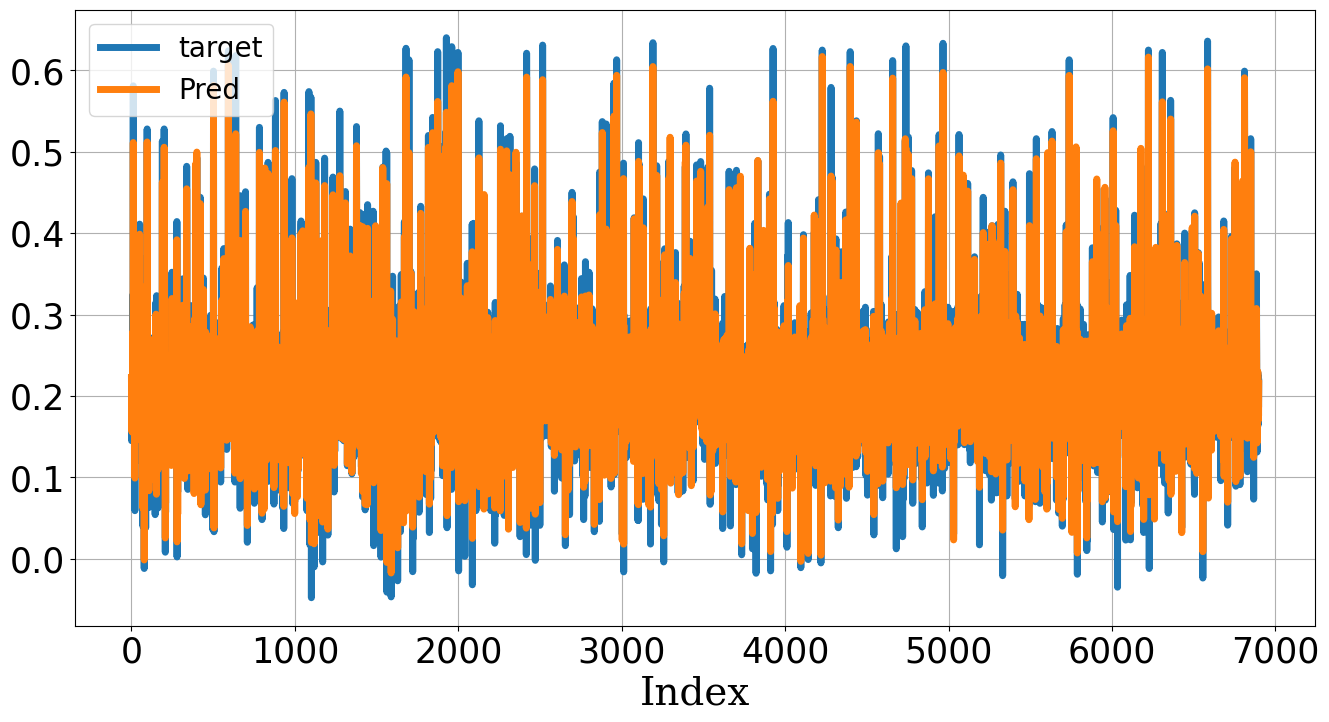

MAE  MSE  MAPE
Train 0.01 0.00  0.09
Test  0.01 0.00  0.08

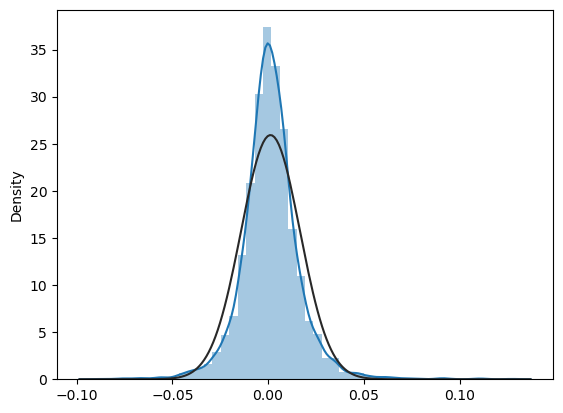

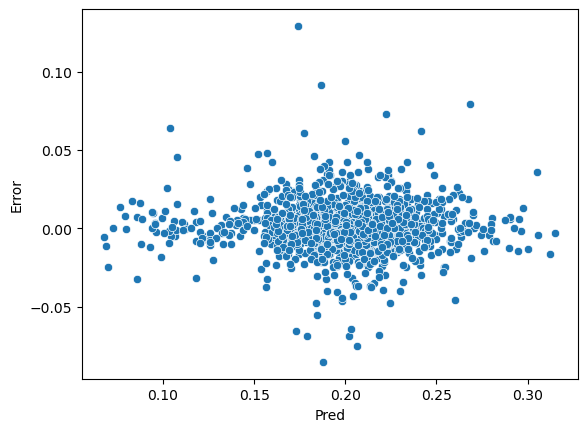

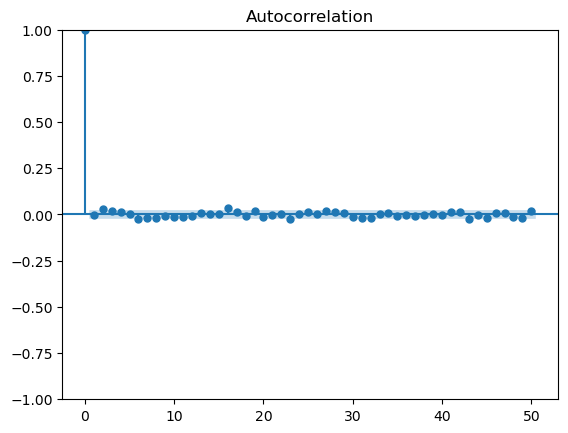

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.93               0.98            21.28   
p-value               0.00               0.56             0.02   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            72.03  
p-value                     0.02  
Alternative                  NaN

In [13]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Voting
## Weak Learners
model_reg = LinearRegression()
model_knn = KNeighborsRegressor()
res = [('LR', model_reg), ('KNN', model_knn)]
model_voting = VotingRegressor(estimators=res)
model_voting.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_voting.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_voting.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_voting = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_voting)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Bagging

##  Decision Tree

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


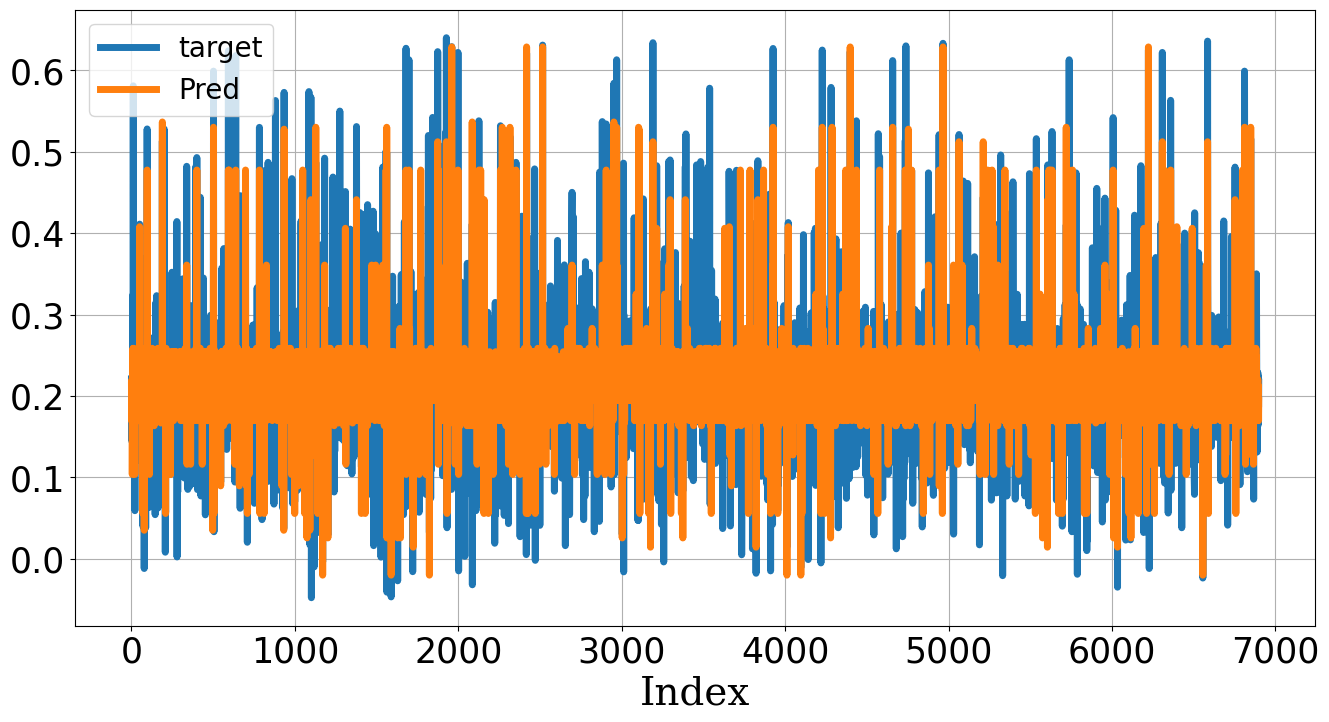

MAE  MSE  MAPE
Train 0.03 0.00  0.46
Test  0.04 0.00  0.32

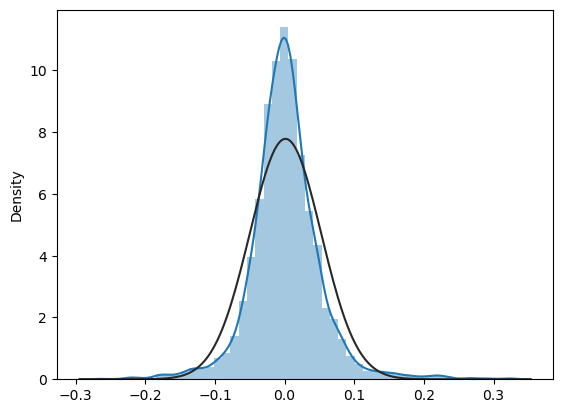

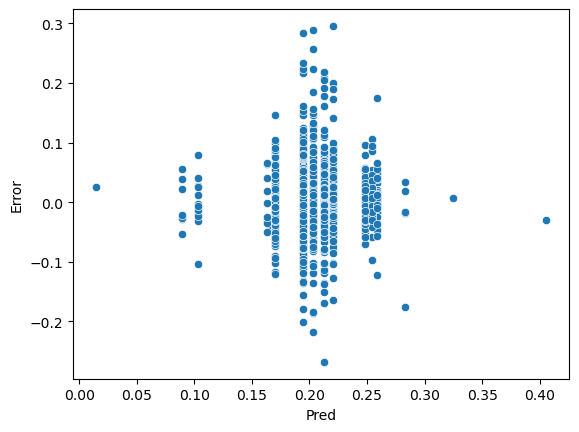

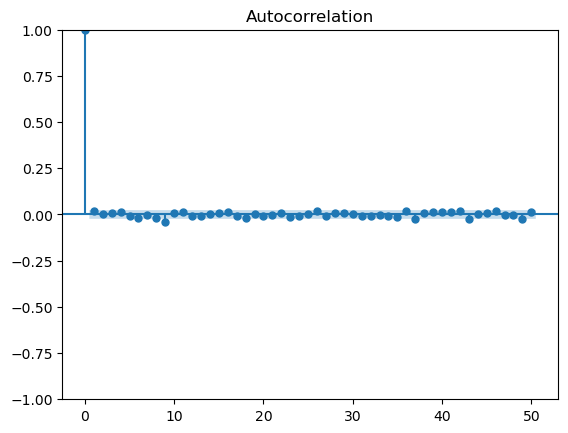

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.93               0.99            20.88   
p-value               0.00               0.69             0.02   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            60.24  
p-value                     0.15  
Alternative                  NaN

In [14]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Decision Tree
model_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=5,
                                 random_state=123)
model_dt.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_dt.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_dt.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_dt = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_dt)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Random Forest

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


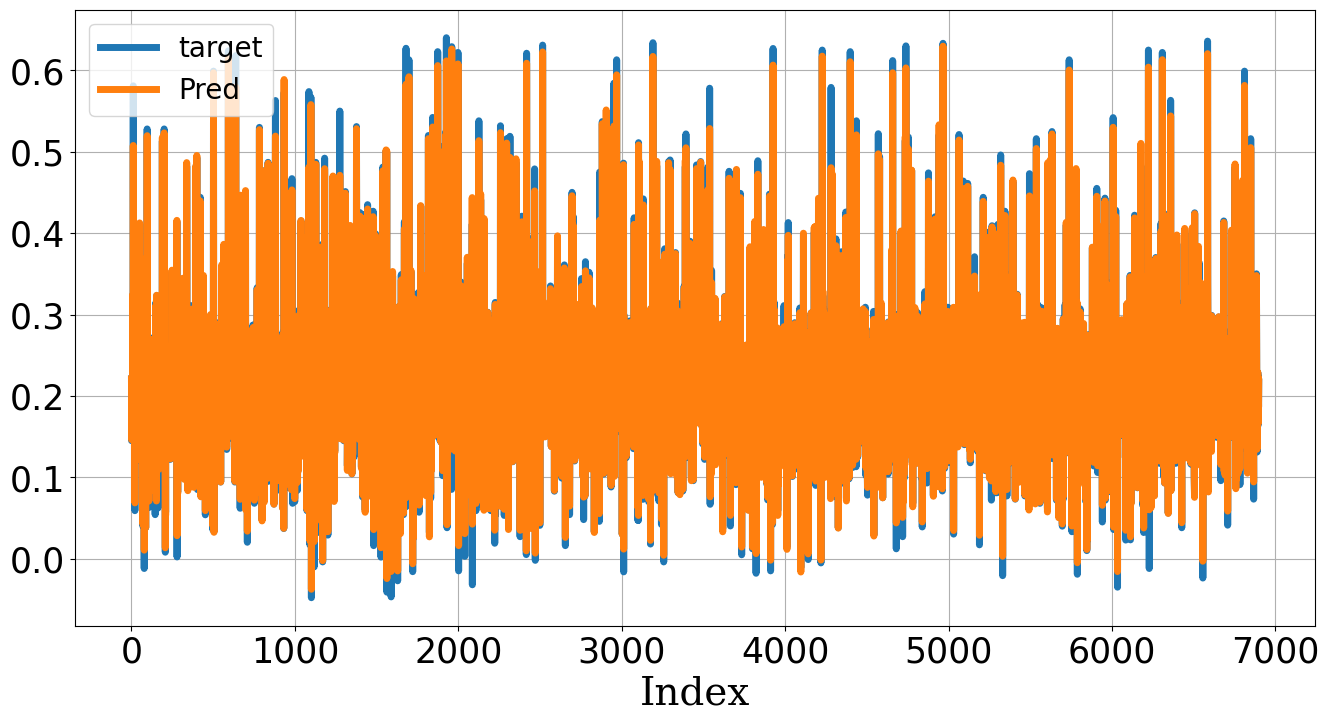

MAE  MSE  MAPE
Train 0.00 0.00  0.02
Test  0.00 0.00  0.02

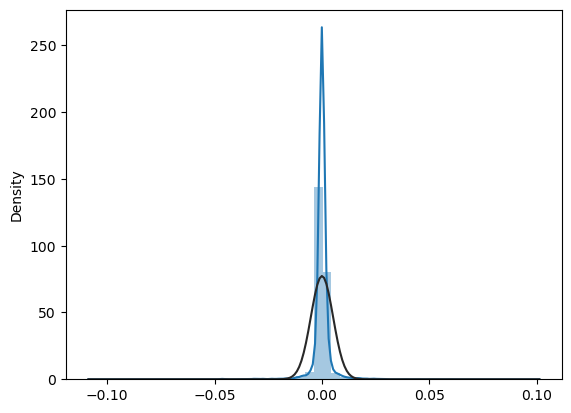

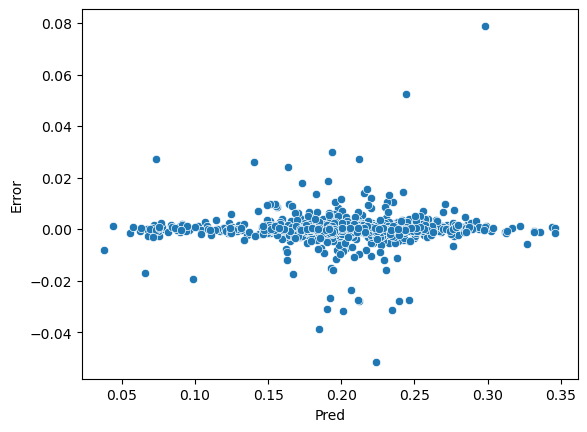

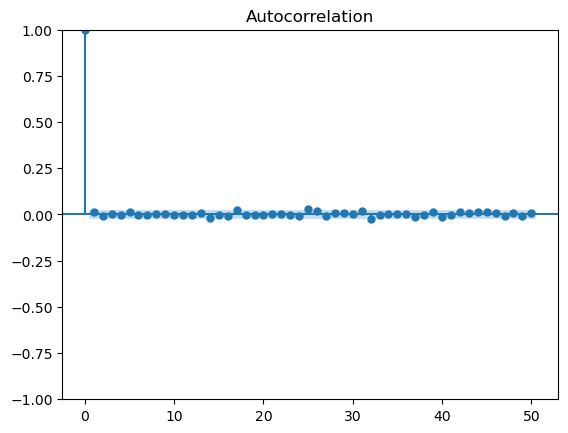

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.43               0.80             2.63   
p-value               0.00               0.00             0.99   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            33.72  
p-value                     0.96  
Alternative                  NaN

In [15]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=123)
model_rf.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_rf.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_rf.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_rf = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_rf)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Random Forest with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


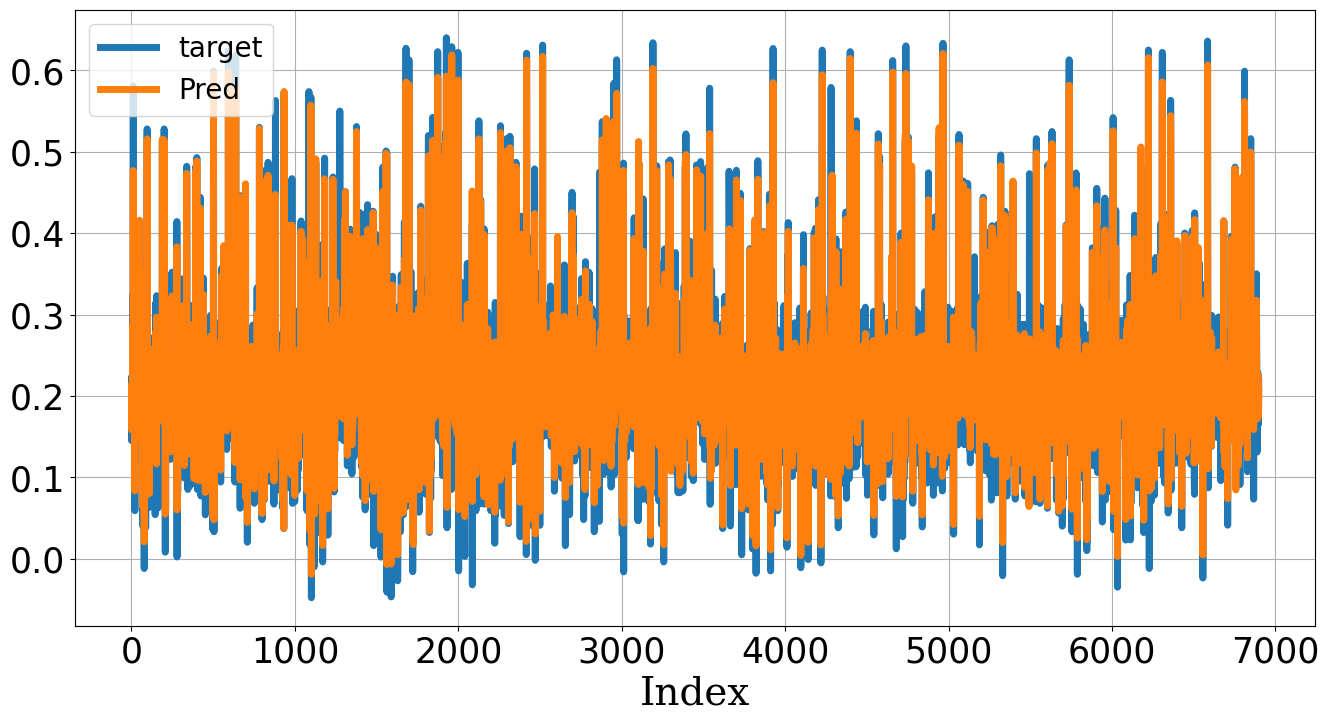

MAE  MSE  MAPE
Train 0.02 0.00  0.14
Test  0.02 0.00  0.12

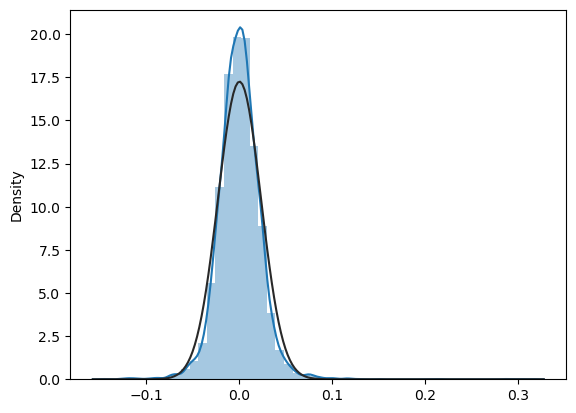

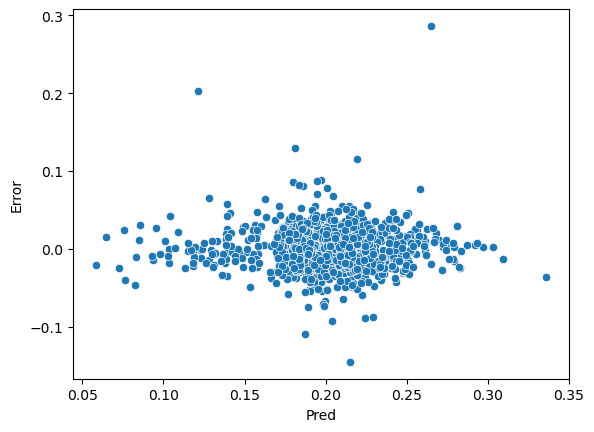

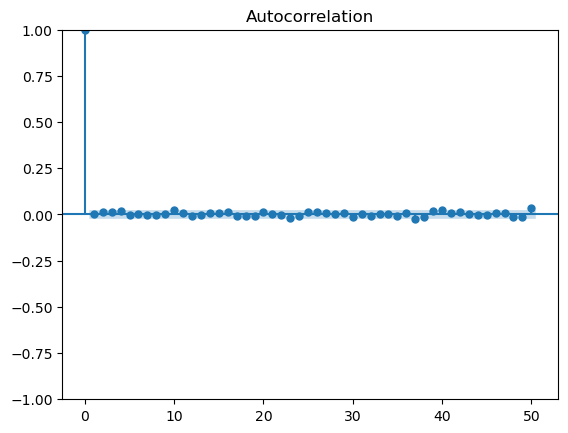

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.92               0.89             8.65   
p-value               0.00               0.00             0.57   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            46.19  
p-value                     0.63  
Alternative                  NaN

In [16]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Random Forest
model_rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [100],  
          'max_depth': [5, 7, 9],   
          'min_samples_leaf': [5, 7, 9],   
          'min_samples_split': [5, 7, 9]}  
model_rf_cv = GridSearchCV(estimator=model_rf, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_rf_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_rf_cv.best_params_)

model_rf_cv_final = RandomForestRegressor(**model_rf_cv.best_params_)
model_rf_cv_final.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_rf_cv_final.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_rf_cv_final.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_rf_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_rf_cv_final)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Boosting

## Gradient Boosting

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


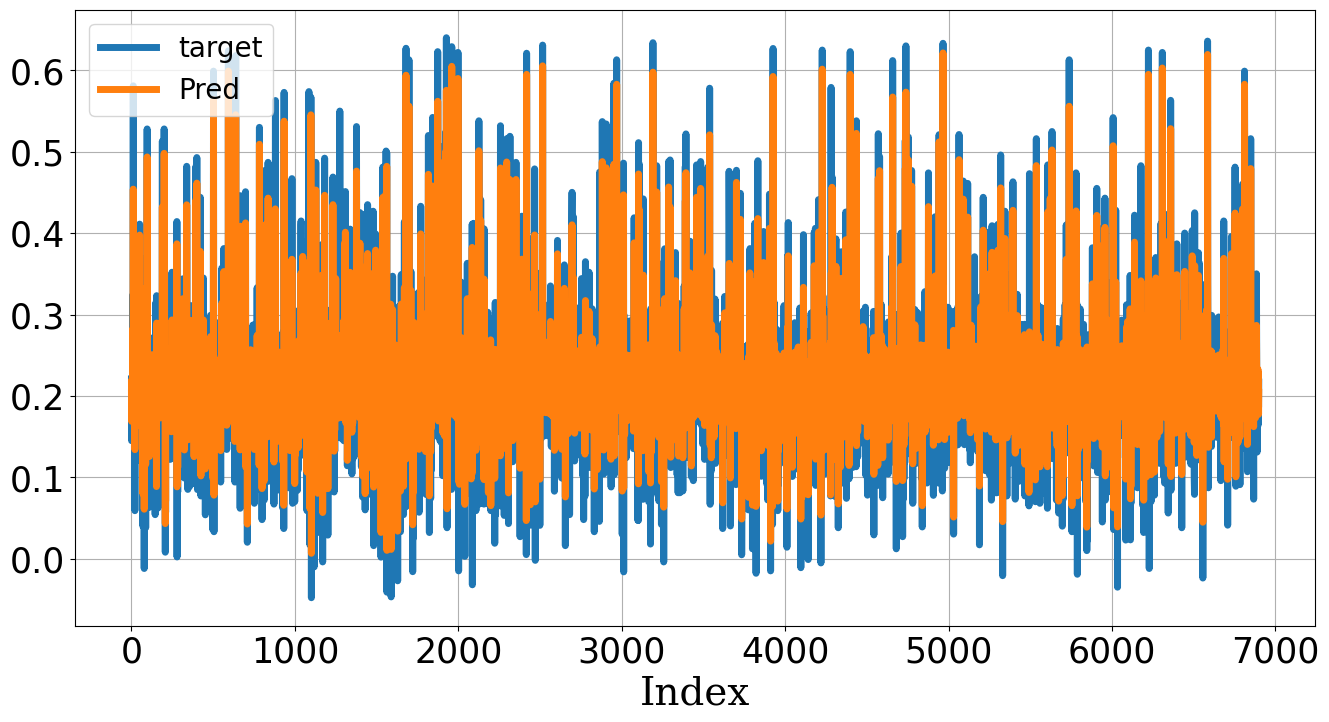

MAE  MSE  MAPE
Train 0.02 0.00  0.24
Test  0.02 0.00  0.17

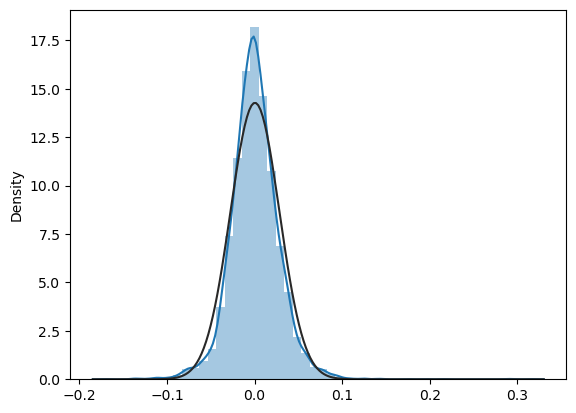

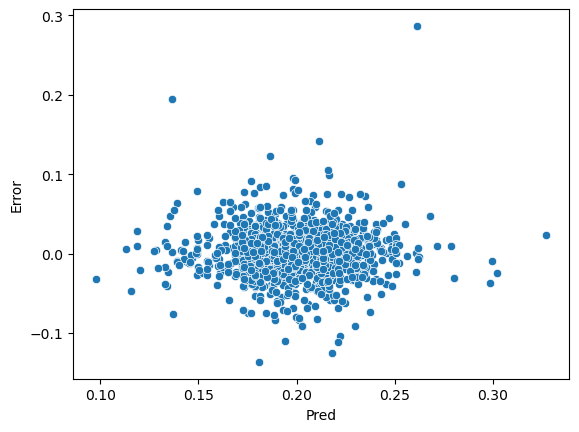

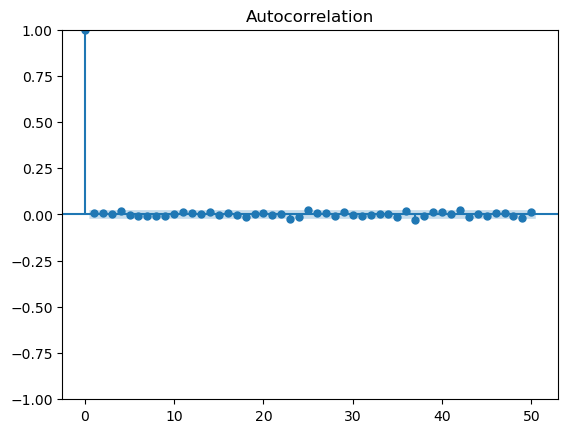

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.95               0.94             5.19   
p-value               0.00               0.06             0.88   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            47.69  
p-value                     0.57  
Alternative                  NaN

In [17]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100,
                                     learning_rate=0.1,
                                     max_depth=3, random_state=123)
model_gb.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_gb.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_gb.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_gb = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_gb)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## GBM with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


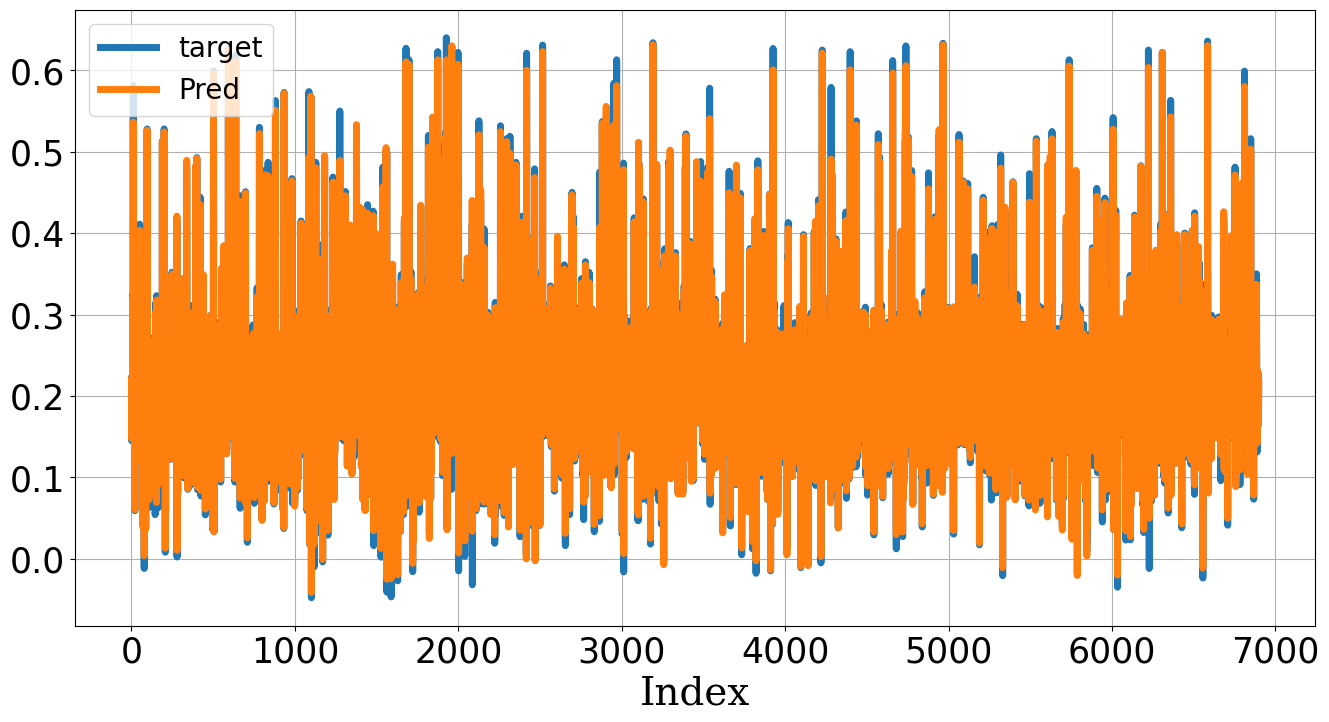

MAE  MSE  MAPE
Train 0.00 0.00  0.02
Test  0.00 0.00  0.03

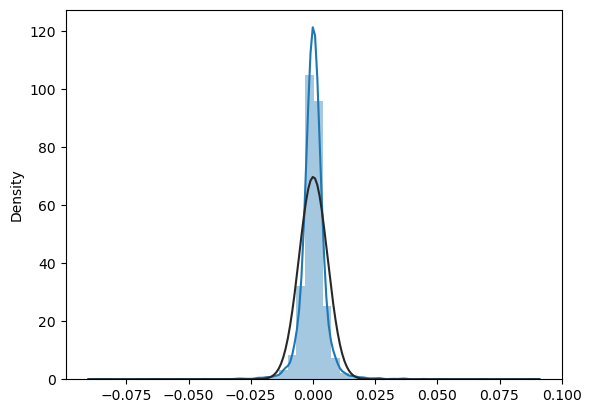

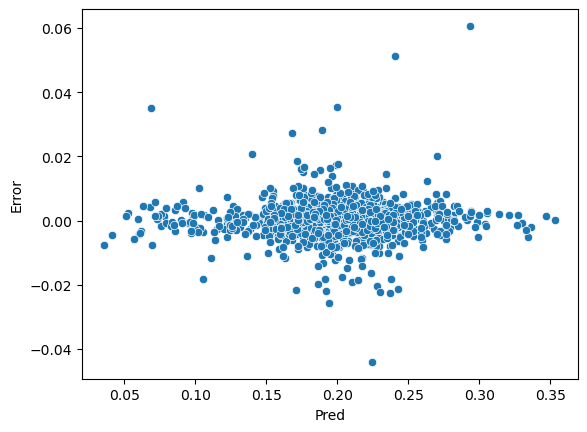

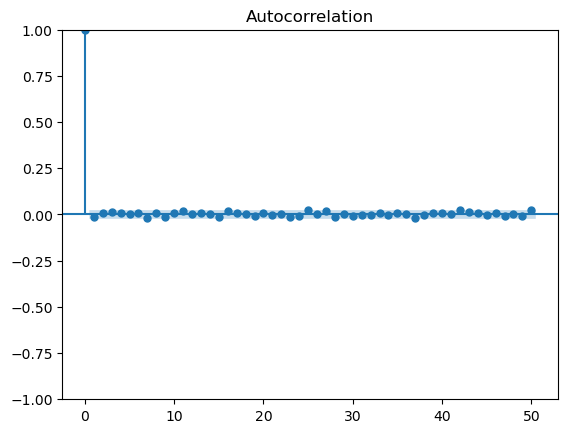

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.73               0.97             7.59   
p-value               0.00               0.40             0.67   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            38.99  
p-value                     0.87  
Alternative                  NaN

In [18]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Gradient Boosting
model_gb = GradientBoostingRegressor()
params = {'n_estimators': [100],   
          'max_depth': [5, 7, 9],    
          'min_samples_leaf': [5, 7, 9],   
          'min_samples_split': [5, 7, 9]}   
model_gb_cv = GridSearchCV(estimator=model_gb, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_gb_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_gb_cv.best_params_)

model_gb_cv_final = GradientBoostingRegressor(**model_gb_cv.best_params_)
model_gb_cv_final.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_gb_cv_final.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_gb_cv_final.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_gb_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_gb_cv_final)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## XGBoost

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


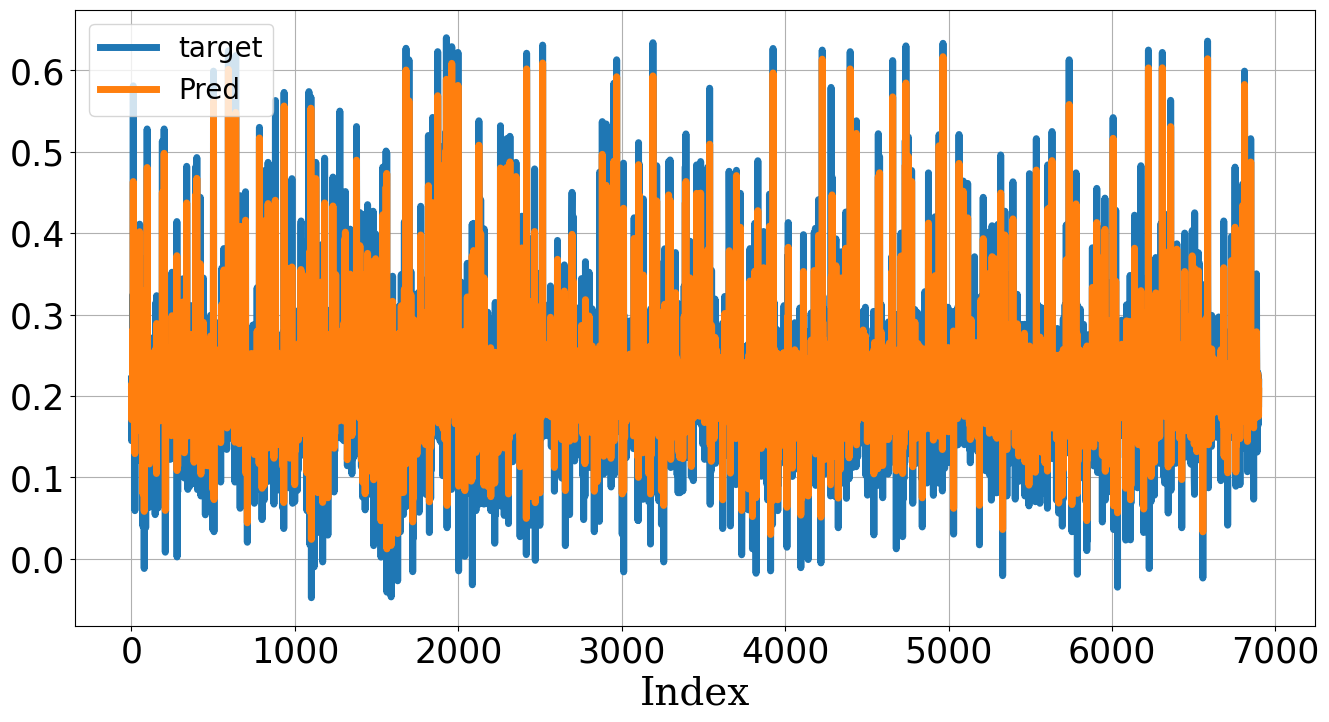

MAE  MSE  MAPE
Train 0.02 0.00  0.25
Test  0.02 0.00  0.17

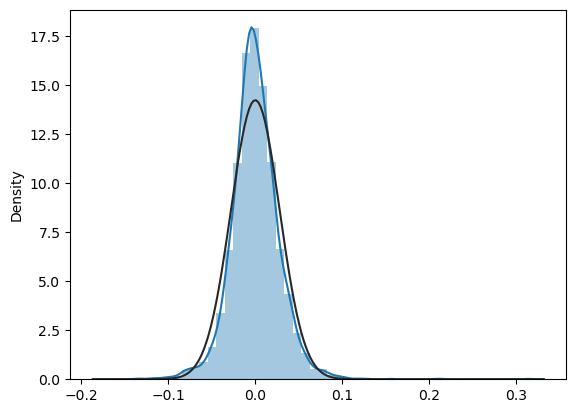

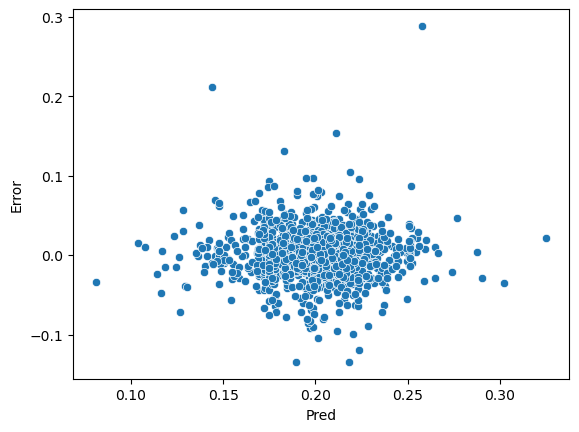

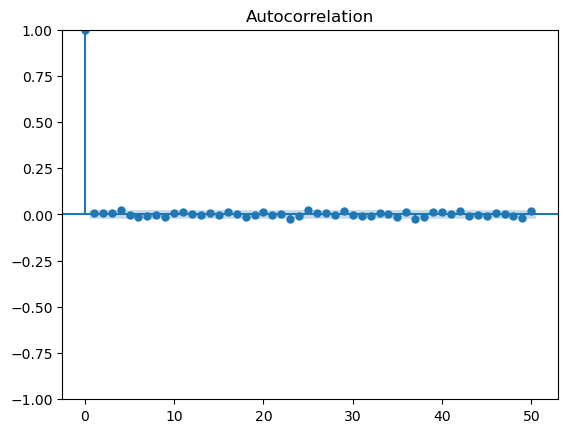

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.95               0.93             8.69   
p-value               0.00               0.02             0.56   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            47.12  
p-value                     0.59  
Alternative                  NaN

In [19]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# XGBoost
model_xgb = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=3, random_state=123)
model_xgb.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_xgb.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_xgb.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_xgb = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_xgb)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## XGBoost with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'gamma': 0.1, 'max_depth': 9, 'min_child_weight': 9, 'n_estimators': 100}


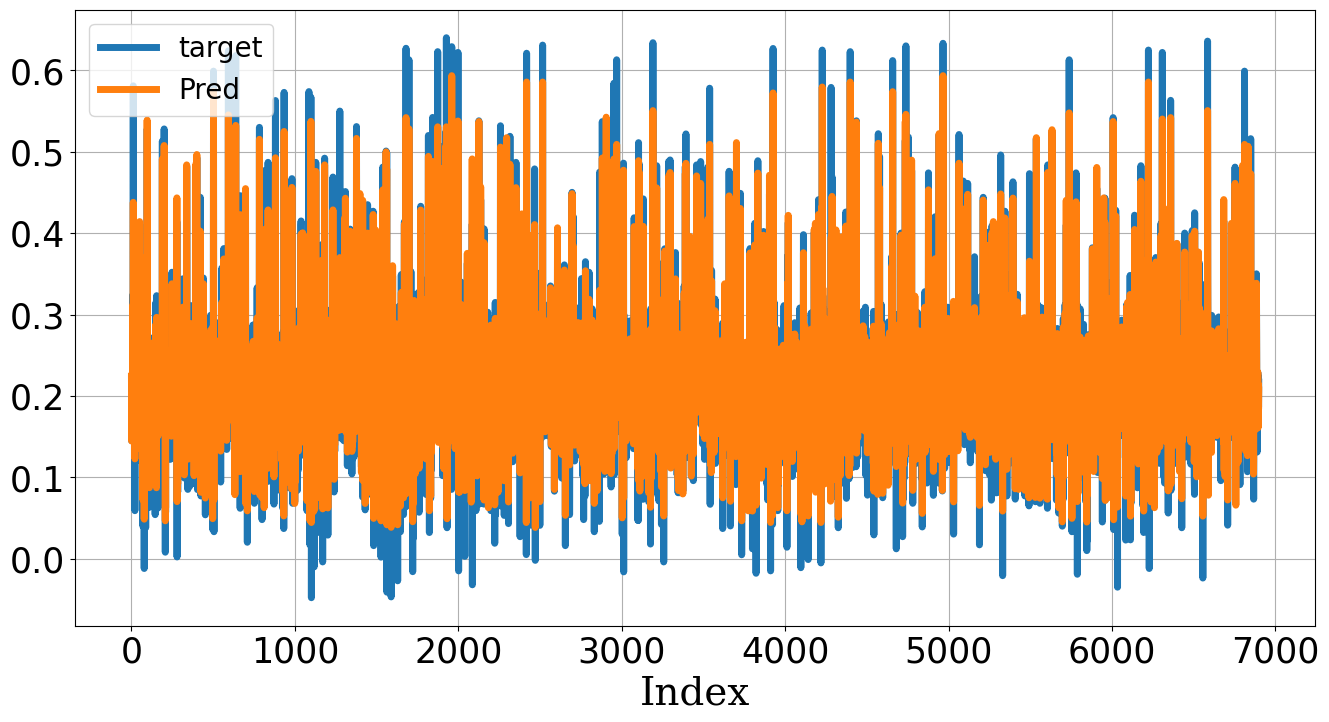

MAE  MSE  MAPE
Train 0.01 0.00  0.17
Test  0.01 0.00  0.11

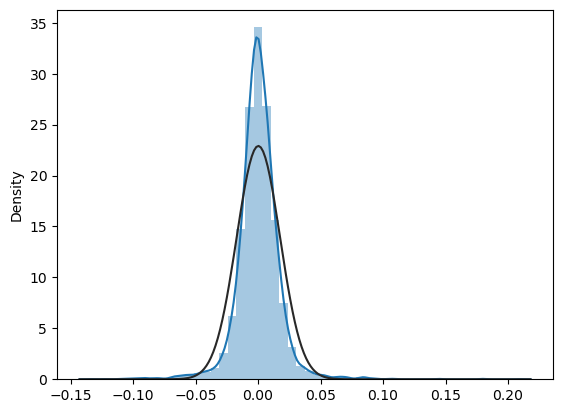

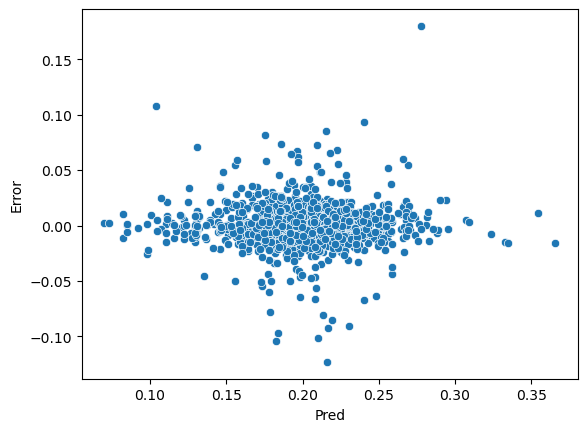

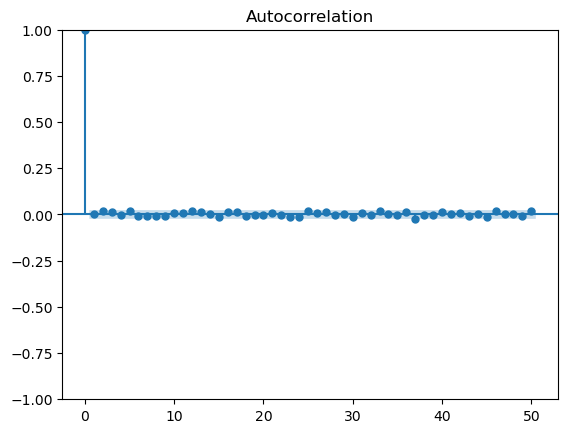

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.88               0.90             8.80   
p-value               0.00               0.00             0.55   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            43.74  
p-value                     0.72  
Alternative                  NaN

In [20]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# XGBoost
model_xgb = XGBRegressor()
params = {'n_estimators': [100],   
          'max_depth': [5, 7, 9],    
          'gamma': [0.1, 0.3, 0.5],    
          'min_child_weight': [5, 7, 9]}   
model_xgb_cv = GridSearchCV(estimator=model_xgb, param_grid=params, 
                            cv=5,    
                            n_jobs=-1)    
model_xgb_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_xgb_cv.best_params_)

model_xgb_cv_final = XGBRegressor(**model_xgb_cv.best_params_)
model_xgb_cv_final.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_xgb_cv_final.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_xgb_cv_final.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_xgb_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_xgb_cv_final)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## LightGBM

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


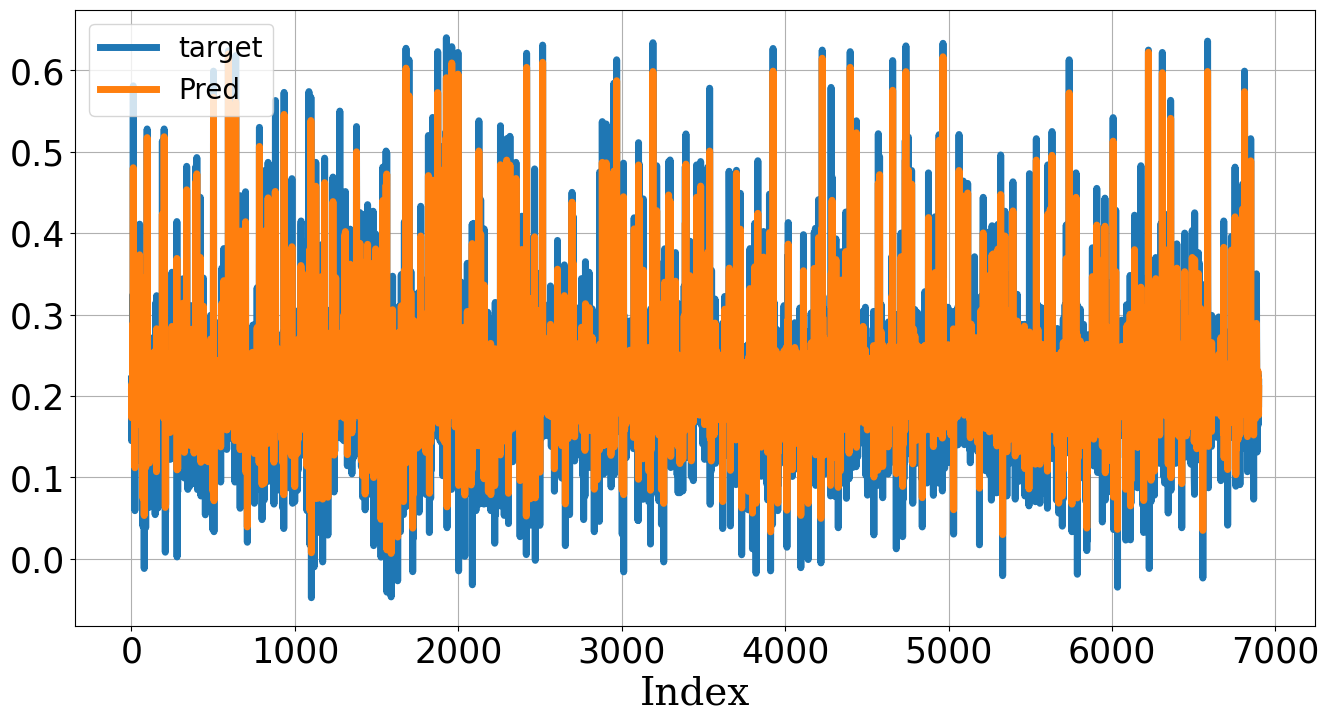

MAE  MSE  MAPE
Train 0.02 0.00  0.24
Test  0.02 0.00  0.17

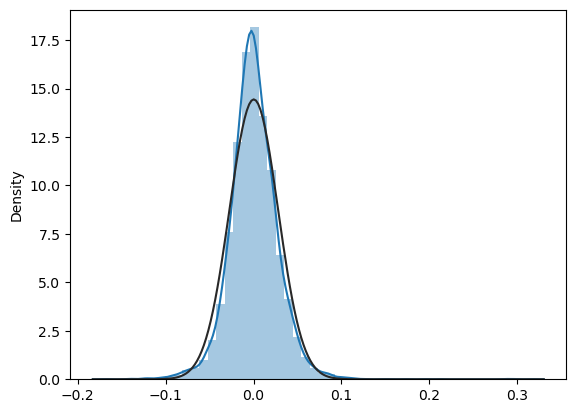

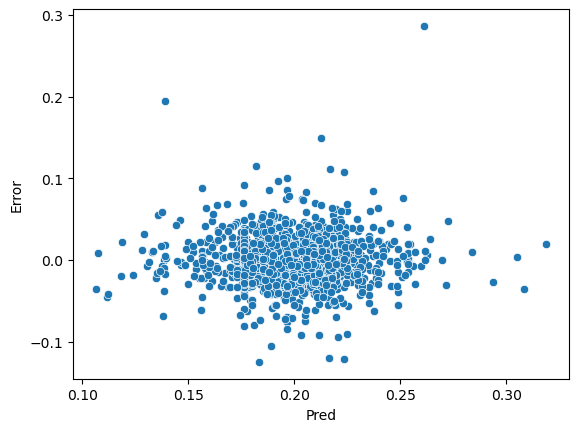

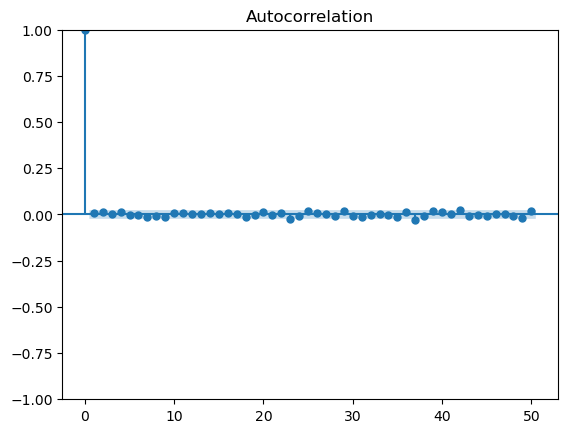

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.95               0.90             6.68   
p-value               0.00               0.00             0.76   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            45.41  
p-value                     0.66  
Alternative                  NaN

In [21]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# LightGBM
model_lgbm = LGBMRegressor(n_estimators=100,
                           learning_rate=0.1,
                           max_depth=3, random_state=123)
model_lgbm.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_lgbm.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_lgbm.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lgbm = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lgbm)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## LightGBM with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 100}


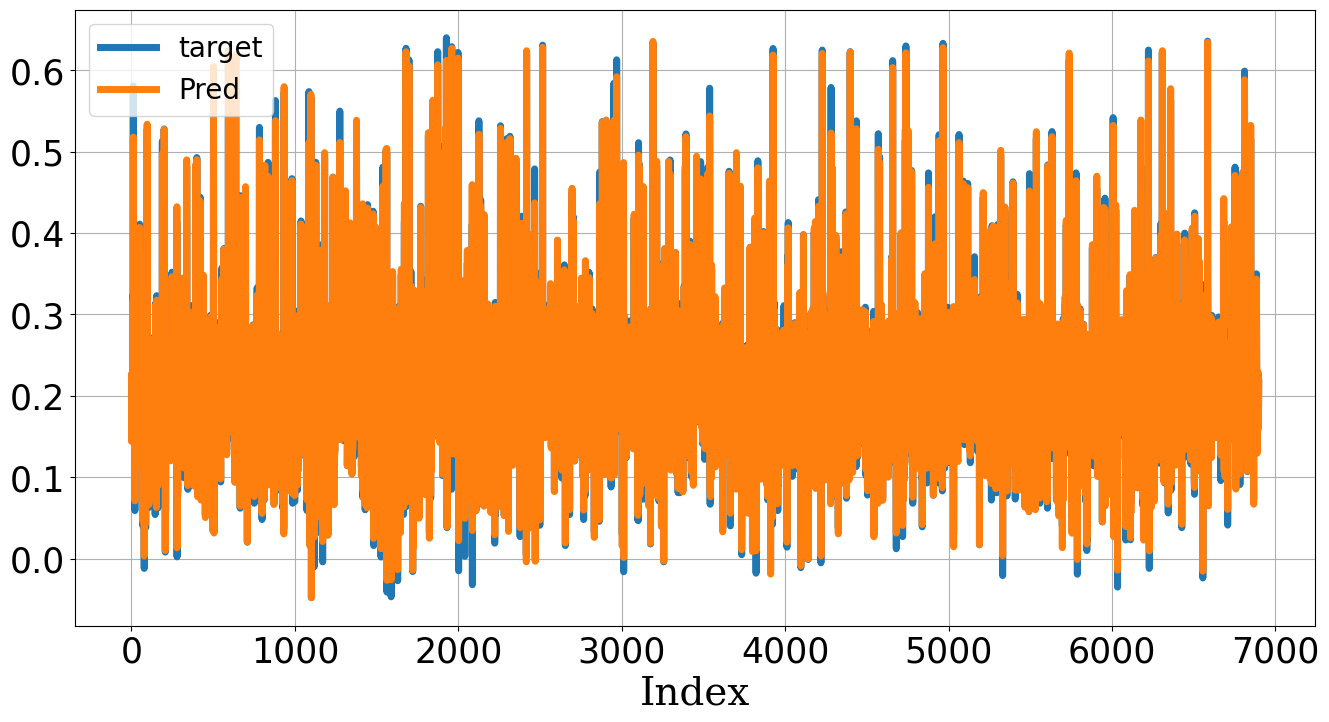

MAE  MSE  MAPE
Train 0.00 0.00  0.02
Test  0.00 0.00  0.03

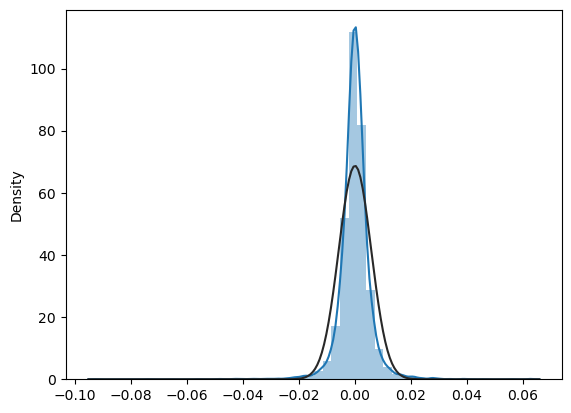

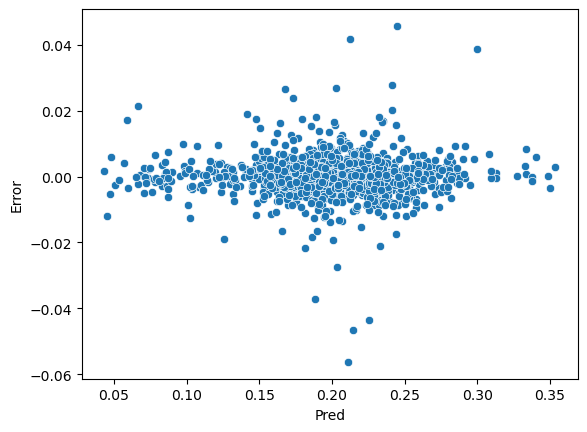

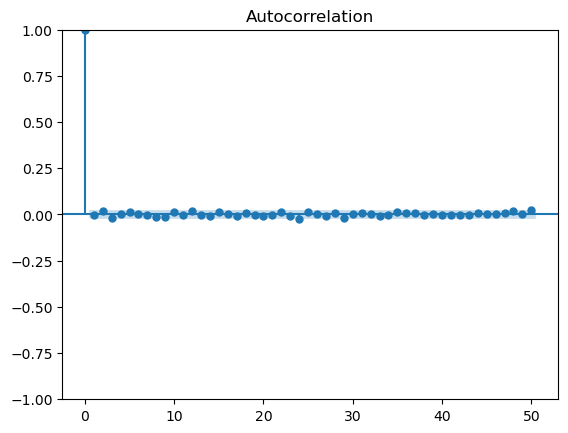

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.81               0.90            10.44   
p-value               0.00               0.00             0.40   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            37.59  
p-value                     0.90  
Alternative                  NaN

In [22]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# LightGBM
model_lgbm = LGBMRegressor()
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9],   
          'min_child_weight': [5, 7, 9]}    
model_lgbm_cv = GridSearchCV(estimator=model_lgbm, param_grid=params, 
                             cv=5,    
                             n_jobs=-1)   
model_lgbm_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_lgbm_cv.best_params_)

model_lgbm_cv_final = XGBRegressor(**model_lgbm_cv.best_params_)
model_lgbm_cv_final.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_lgbm_cv_final.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_lgbm_cv_final.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_lgbm_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_lgbm_cv_final)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## CatBoost

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


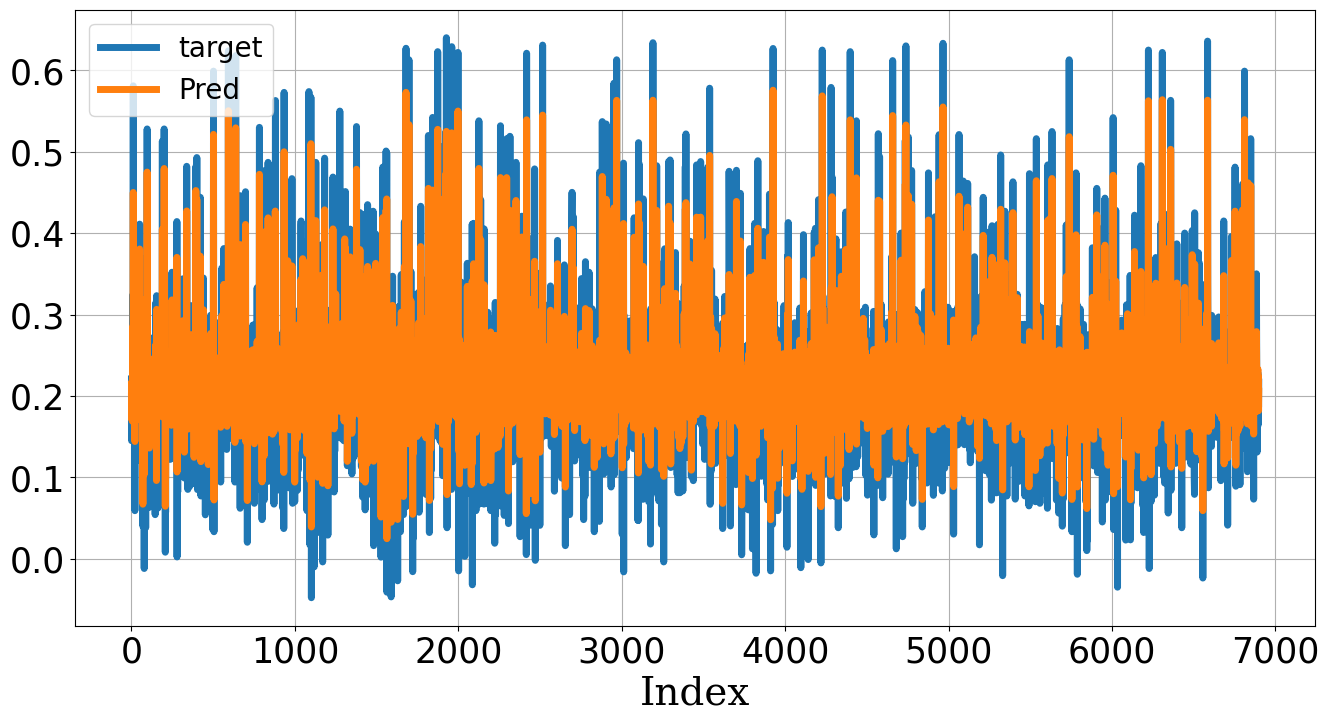

MAE  MSE  MAPE
Train 0.02 0.00  0.33
Test  0.02 0.00  0.20

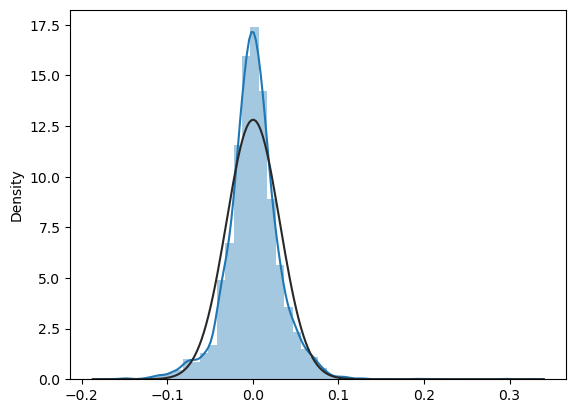

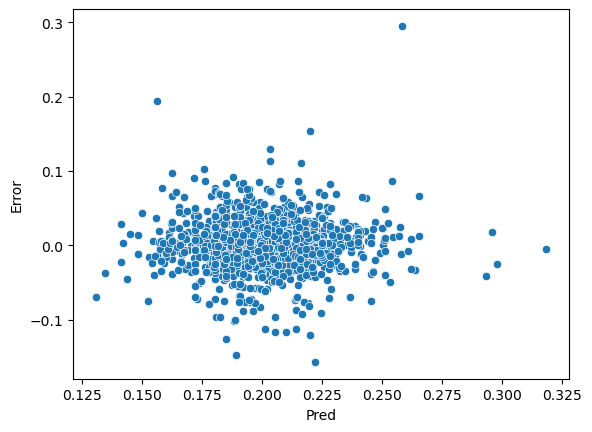

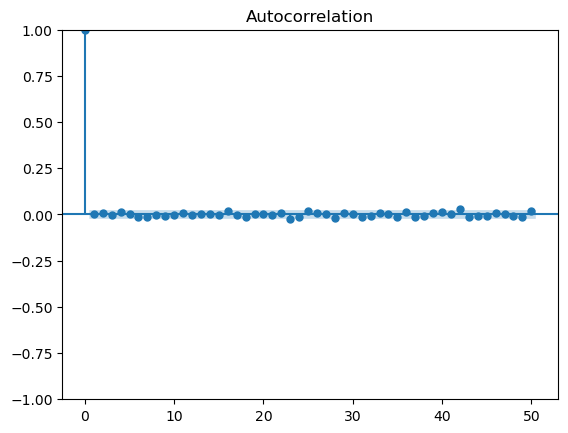

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.95               0.92             6.03   
p-value               0.00               0.02             0.81   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            43.51  
p-value                     0.73  
Alternative                  NaN

In [23]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# CatBoost
model_cb = CatBoostRegressor(n_estimators=100,
                             learning_rate=0.1,
                             max_depth=3, random_state=123,
                             verbose=0)
model_cb.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_cb.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_cb.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_cb = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_cb)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## CatBoost with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)
최적 하이퍼 파라미터:  {'max_depth': 5, 'n_estimators': 100}
Learning rate set to 0.449607
0:	learn: 0.0608351	total: 29.3ms	remaining: 2.9s
1:	learn: 0.0572438	total: 59.7ms	remaining: 2.93s
2:	learn: 0.0542016	total: 81.3ms	remaining: 2.63s
3:	learn: 0.0501527	total: 93.2ms	remaining: 2.24s
4:	learn: 0.0490064	total: 105ms	remaining: 2s
5:	learn: 0.0446460	total: 117ms	remaining: 1.83s
6:	learn: 0.0416971	total: 139ms	remaining: 1.85s
7:	learn: 0.0390993	total: 164ms	remaining: 1.88s
8:	learn: 0.0372206	total: 189ms	remaining: 1.91s
9:	learn: 0.0351392	total: 207ms	remaining: 1.86s
10:	learn: 0.0334364	total: 227ms	remaining: 1.84s
11:	learn: 0.0327708	total: 252ms	remaining: 1.84s
12:	learn: 0.0316654	total: 268ms	remaining: 1.79s
13:	learn: 0.0306726	total: 295ms	remaining: 1.81s
14:	learn: 0.0299010	total: 325ms	remaining: 1.84s
15:	learn: 0.0285494	total: 352ms	remaining: 1.85s
16:	learn: 0.0272838	total: 380ms	remaining: 1.85s
17:	learn: 0.026738

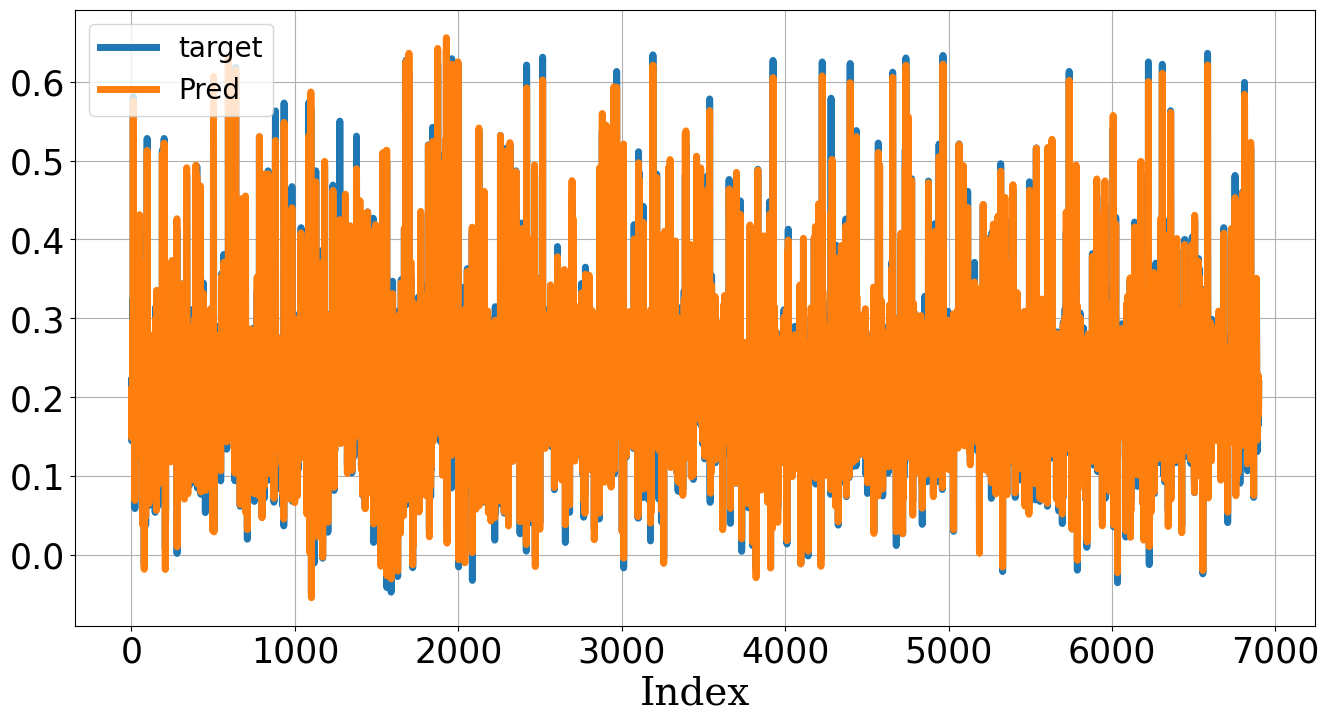

MAE  MSE  MAPE
Train 0.01 0.00  0.05
Test  0.01 0.00  0.05

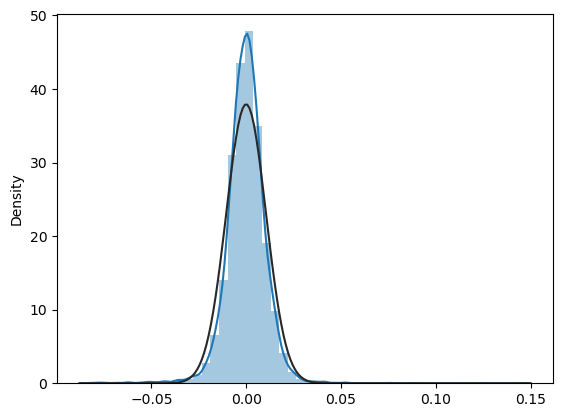

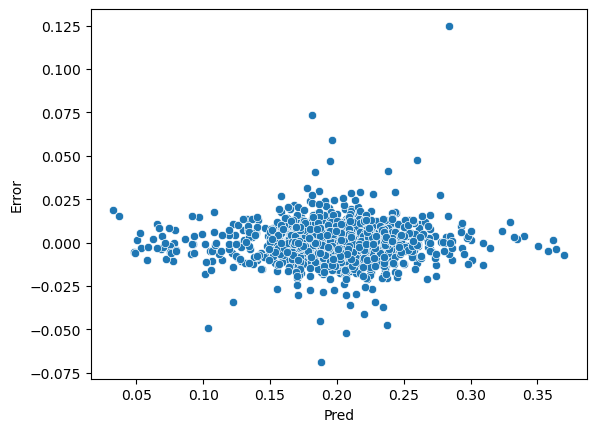

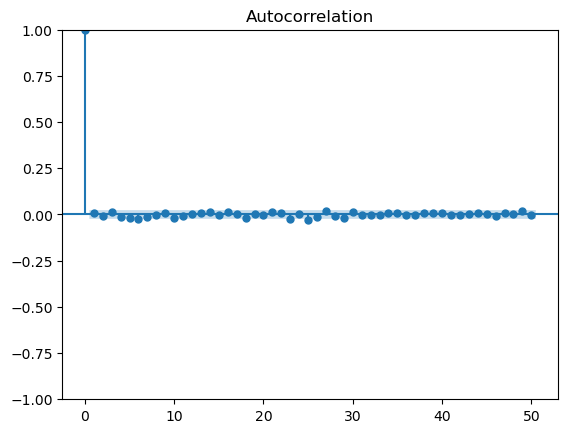

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.91               0.91            13.65   
p-value               0.00               0.01             0.19   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            45.10  
p-value                     0.67  
Alternative                  NaN

In [24]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# CatBoost
model_cb = CatBoostRegressor(verbose=0)
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9]}    
model_cb_cv = GridSearchCV(estimator=model_cb, param_grid=params, 
                           cv=5,    
                           n_jobs=-1)   
model_cb_cv.fit(X_train, Y_train)
print("최적 하이퍼 파라미터: ", model_cb_cv.best_params_)

model_cb_cv_final = CatBoostRegressor(**model_cb_cv.best_params_)
model_cb_cv_final.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_cb_cv_final.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_cb_cv_final.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_cb_cv_final = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_cb_cv_final)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Advanced Algorithm:** Stacking

## Stacking

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


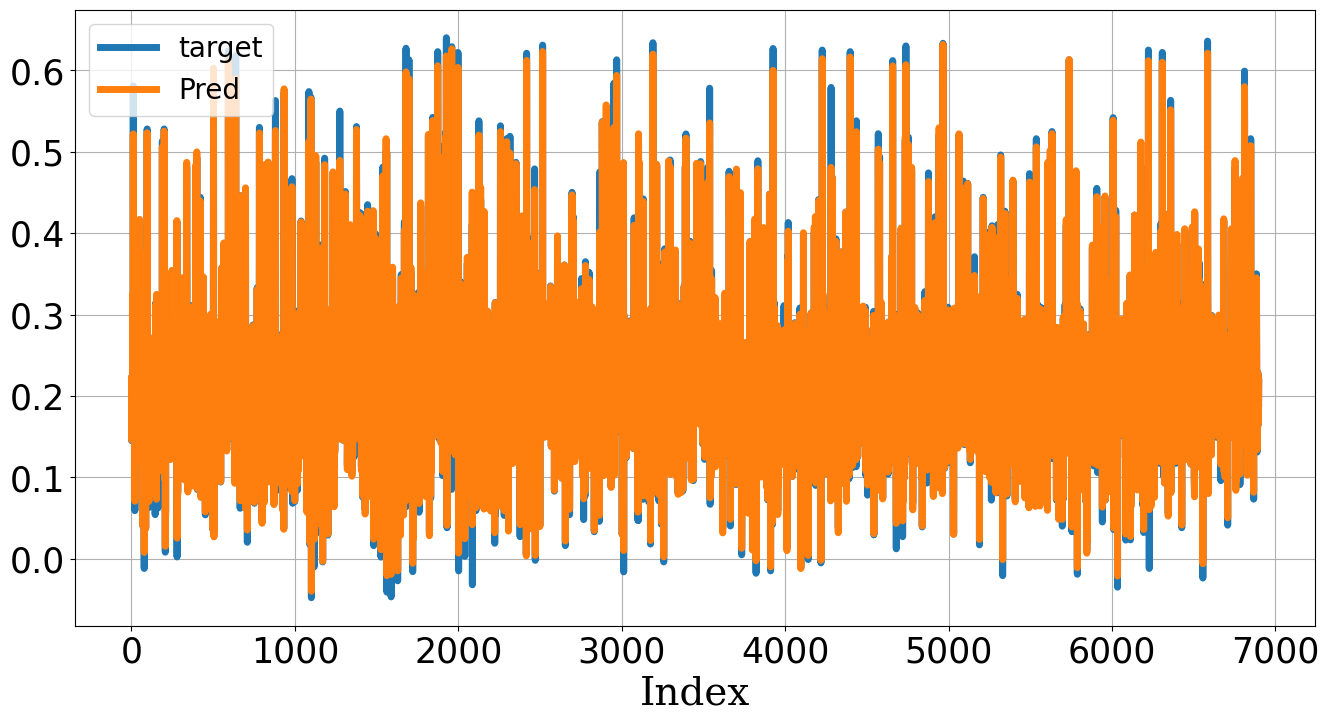

MAE  MSE  MAPE
Train 0.00 0.00  0.01
Test  0.00 0.00  0.02

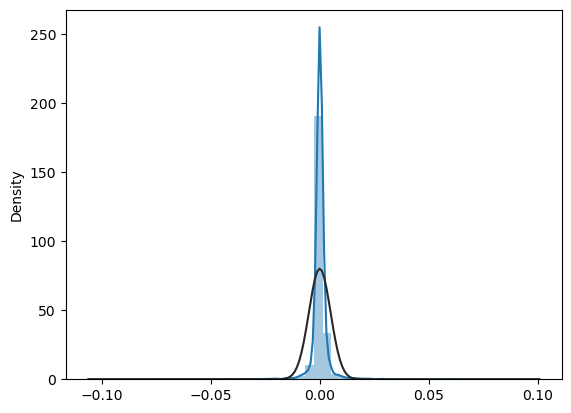

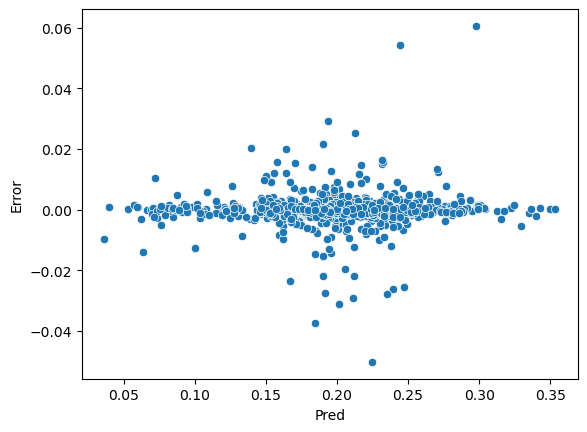

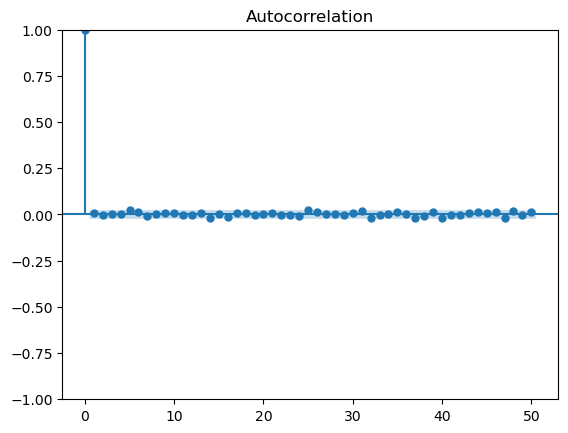

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.44               0.82             7.31   
p-value               0.00               0.00             0.70   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            44.62  
p-value                     0.69  
Alternative                  NaN

In [25]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Stacking
## Weak Learners
model_knn = KNeighborsRegressor()
model_svm = SVR()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

model_reg = LinearRegression()
res = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingRegressor(regressors=res, 
                                meta_regressor=model_reg)
model_stack.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_stack.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_stack.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_stack = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_stack)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## Stacking with Hyperparameter Tuning

(27596, 5) (27596, 1)
(6899, 5) (6899, 1)


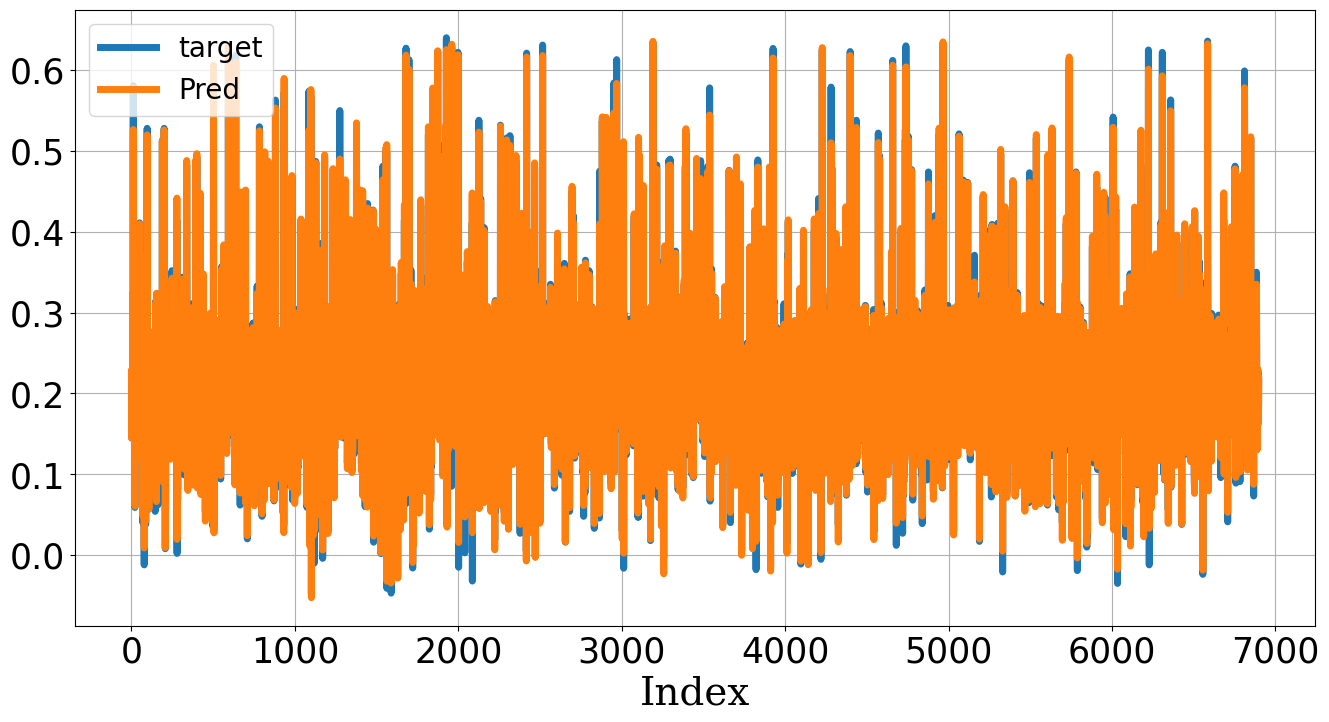

MAE  MSE  MAPE
Train 0.00 0.00  0.02
Test  0.00 0.00  0.03

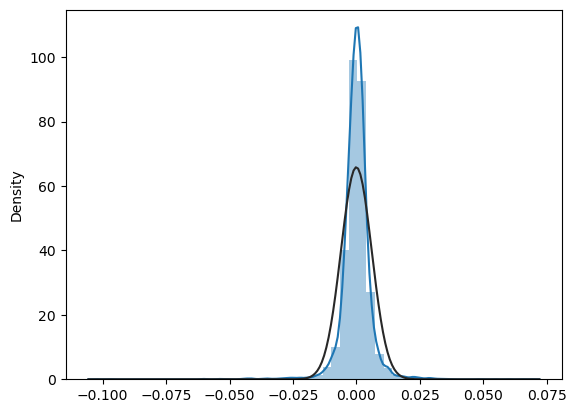

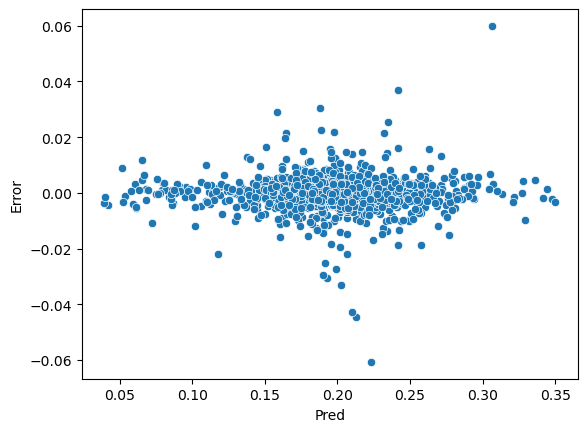

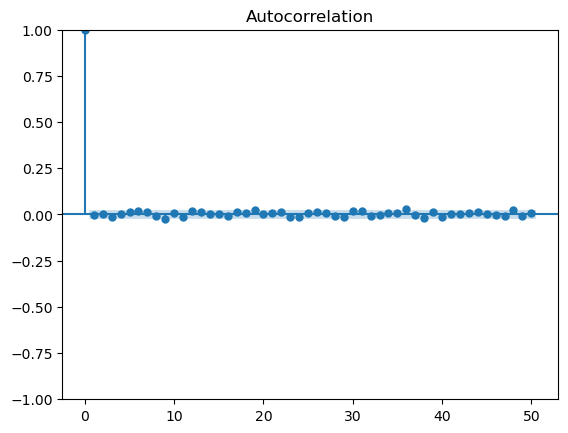

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics       0.77               0.86            10.67   
p-value               0.00               0.00             0.38   
Alternative            NaN          two-sided              NaN   

                 Autocorr(lag50)  
Test Statistics            55.59  
p-value                     0.27  
Alternative                  NaN

In [26]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Battery', 'anomaly_detection_sample.csv')
df = pd.read_csv(location)

# 데이터 전처리
Y_colname = ['target']
X_delete = ['ID_Cell', 'gap1_3', 'gap2_3', 'gap4_5', 'Label']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname, X_delete)

scaler = preprocessing.MinMaxScaler()
X_train, X_test = scale(scaler, X_train, X_test)

# Stacking
## Weak Learners
model_knn = KNeighborsRegressor()
model_svm = SVR()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

model_reg = LinearRegression()
res = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingCVRegressor(regressors=res, meta_regressor=model_reg)

params = {'kneighborsregressor__n_neighbors': [5, 7],
          'svr__kernel': ['rbf'],
          'randomforestregressor__n_estimators': [100],
          'randomforestregressor__max_depth': [5, 7, 9],    
          'xgbregressor__n_estimators': [100],    
          'xgbregressor__max_depth': [5, 7, 9]}
model_stack_cv = GridSearchCV(estimator=model_stack, param_grid=params, 
                              cv=5,    # CV 반복 횟수
                              n_jobs=-1)    # n_jobs=-1이면 모든 cpu사용 학습
model_stack_cv.fit(X_train, Y_train)

Y_trpred = pd.DataFrame(model_stack_cv.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model_stack_cv.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_stack_cv = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_stack_cv)

# 에러 분석
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Comparison**

MAE  MSE  MAPE
Linear Regression 0.02 0.00  0.10
Ridge             0.00 0.00  0.03
Lasso             0.04 0.00  0.43
Elastic Net       0.04 0.00  0.43
Voting            0.01 0.00  0.08
Decision Tree     0.04 0.00  0.32
Random Forest     0.00 0.00  0.02
RF with CF        0.02 0.00  0.12
Gradient Boosting 0.02 0.00  0.17
GBM with CV       0.00 0.00  0.03
XGBoost           0.02 0.00  0.17
XGBoost with CV   0.01 0.00  0.11
LightGBM          0.02 0.00  0.17
LightGBM with CV  0.00 0.00  0.03
CatbBoost         0.02 0.00  0.20
CatBoost with CV  0.01 0.00  0.05
Stacking          0.00 0.00  0.02
Stacking with CV  0.00 0.00  0.03

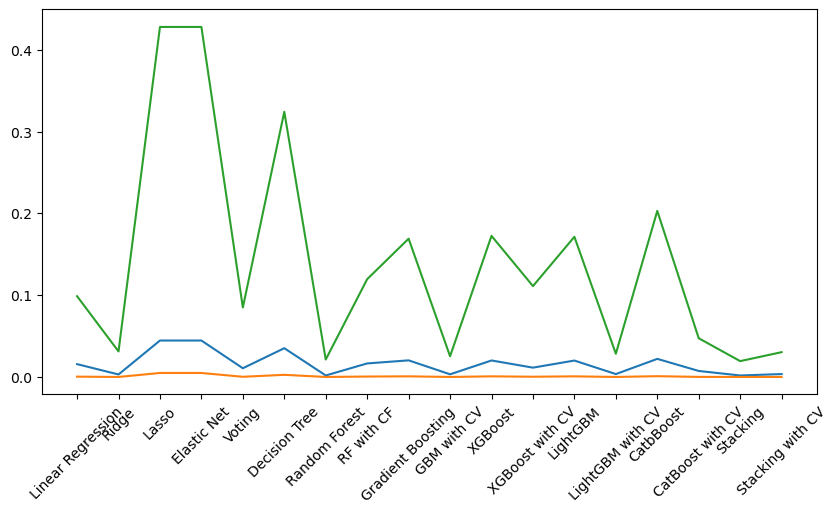

In [27]:
# 결과비교
labels = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 
          'Voting', 'Decision Tree', 'Random Forest', 'RF with CF', 
          'Gradient Boosting', 'GBM with CV', 'XGBoost', 'XGBoost with CV', 
          'LightGBM', 'LightGBM with CV', 'CatbBoost', 'CatBoost with CV',
          'Stacking', 'Stacking with CV']
models = [Score_lr, Score_ridge, Score_lasso, Score_en, Score_voting, Score_dt,
          Score_rf, Score_rf_cv_final, Score_gb, Score_gb_cv_final,
          Score_xgb, Score_xgb_cv_final, Score_lgbm, Score_lgbm_cv_final, 
          Score_cb, Score_cb_cv_final, Score_stack, Score_stack_cv]
result_regression = pd.DataFrame()
for result in models:
    result_regression = pd.concat([result_regression, result.iloc[1:,:]], axis=0)
result_regression.index = labels
display(result_regression)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(result_regression)
plt.xticks(rotation=45)
plt.show()